# Live Links

1.   Books - https://drive.google.com/file/d/1VM34RzBmVBnuD9KmwMgKU7y_4QSQ1-_U/view?usp=sharing

2.   Ratings - https://drive.google.com/file/d/16Y_m1hJVRSKzCq1Mdd2w9_BgNDxNGl2G/view?usp=sharing

3.   Users - https://drive.google.com/file/d/17_DGz7XxJtk3rZ8Y9bLqnZGkgiiUk_lb/view?usp=sharing



# Importing Data

In [ ]:
import pandas as pd

def get_gdrive_download_link(gdrive_link):
    """Extracts the file ID and constructs a direct download link for Google Drive."""
    try:
        # Extract file ID from the Google Drive sharing link
        if 'file/d/' in gdrive_link:
            file_id = gdrive_link.split('file/d/')[1].split('/')[0]
        elif 'id=' in gdrive_link:
            file_id = gdrive_link.split('id=')[1].split('&')[0]
        else:
            raise ValueError("Google Drive link format not recognized. Ensure it's a 'view?usp=sharing' type link.")

        return f'https://drive.google.com/uc?export=download&id={file_id}'
    except Exception as e:
        print(f"Error parsing Google Drive link {gdrive_link}: {e}")
        return None

# Google Drive links
books_sharing_link = 'https://drive.google.com/file/d/1VM34RzBmVBnuD9KmwMgKU7y_4QSQ1-_U/view?usp=sharing'
ratings_sharing_link = 'https://drive.google.com/file/d/16Y_m1hJVRSKzCq1Mdd2w9_BgNDxNGl2G/view?usp=sharing'
users_sharing_link = 'https://drive.google.com/file/d/17_DGz7XxJtk3rZ8Y9bLqnZGkgiiUk_lb/view?usp=sharing'

# Convert sharing links to direct download links
books_download_url = get_gdrive_download_link(books_sharing_link)
ratings_download_url = get_gdrive_download_link(ratings_sharing_link)
users_download_url = get_gdrive_download_link(users_sharing_link)

# Initialize DataFrames
books_df = None
ratings_df = None
users_df = None

# Load DataFrames and display head
if books_download_url:
    print("Loading Books data...")
    try:
        books_df = pd.read_csv(books_download_url)
        print("Books data loaded successfully. First 5 rows:")
        display(books_df.head())
    except Exception as e:
        print(f"Error loading Books data from {books_download_url}: {e}")

if ratings_download_url:
    print("\nLoading Ratings data...")
    try:
        ratings_df = pd.read_csv(ratings_download_url)
        print("Ratings data loaded successfully. First 5 rows:")
        display(ratings_df.head())
    except Exception as e:
        print(f"Error loading Ratings data from {ratings_download_url}: {e}")

if users_download_url:
    print("\nLoading Users data...")
    try:
        users_df = pd.read_csv(users_download_url)
        print("Users data loaded successfully. First 5 rows:")
        display(users_df.head())
    except Exception as e:
        print(f"Error loading Users data from {users_download_url}: {e}")

Loading Books data...


/tmp/ipython-input-185839404.py:38: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv(books_download_url)


Books data loaded successfully. First 5 rows:


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...



Loading Ratings data...
Ratings data loaded successfully. First 5 rows:


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6



Loading Users data...
Users data loaded successfully. First 5 rows:


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


# Data preprocessing

## Remove rows where Age is less than equal to 17 or greater than equal to 71

In [ ]:
# Remove rows where Age is less than equal to 17 or greater than equal to 71
users_df = users_df[~((users_df['Age'] <= 17) | (users_df['Age'] >= 71))]

print("Updated DataFrame info:")
users_df.info()

Updated DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 264585 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   264585 non-null  int64  
 1   Location  264585 non-null  object 
 2   Age       153823 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.1+ MB


## Remove rows where rating is 0

In [ ]:
# Remove rows where rating is 0
ratings_df = ratings_df[~(ratings_df['Book-Rating'] == 0)]

print("Rows with Ratings 0 have been removed.")
print("Updated DataFrame info:")
ratings_df.info()

Rows with Ratings 0 have been removed.
Updated DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 433671 entries, 1 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      433671 non-null  int64 
 1   ISBN         433671 non-null  object
 2   Book-Rating  433671 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 13.2+ MB


# Taking random sample and merging matching data from users and ratings dataframes

In [ ]:
group_id = 183950
sample_size = 10001
# Select a random sample of 10001 records
random_books_sample = books_df.sample(n=sample_size, random_state=group_id)
print(f"Successfully selected a random sample of {sample_size} records from books_df.")
print("First 5 rows of the random sample:")
display(random_books_sample.head())


Successfully selected a random sample of 10001 records from books_df.
First 5 rows of the random sample:


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
160598,0374152195,The Four of Us: The Story of a Family,Elizabeth Swados,1991,Farrar Straus Giroux,http://images.amazon.com/images/P/0374152195.0...,http://images.amazon.com/images/P/0374152195.0...,http://images.amazon.com/images/P/0374152195.0...
167517,055327290X,Too Many Cooks,REX STOUT,1988,Crimeline,http://images.amazon.com/images/P/055327290X.0...,http://images.amazon.com/images/P/055327290X.0...,http://images.amazon.com/images/P/055327290X.0...
114738,0062514245,Prayer Is Good Medicine: How to Reap the Heali...,Larry Dossey,1997,HarperSanFrancisco,http://images.amazon.com/images/P/0062514245.0...,http://images.amazon.com/images/P/0062514245.0...,http://images.amazon.com/images/P/0062514245.0...
81090,0743227328,The Sex-Starved Marriage: A Couple's Guide to ...,Michele Weiner-Davis,2003,Simon &amp; Schuster,http://images.amazon.com/images/P/0743227328.0...,http://images.amazon.com/images/P/0743227328.0...,http://images.amazon.com/images/P/0743227328.0...
237703,0808565494,Heaven (Casteel Saga (Hardcover)),V. C Andrews,1999,Sagebrush Bound,http://images.amazon.com/images/P/0808565494.0...,http://images.amazon.com/images/P/0808565494.0...,http://images.amazon.com/images/P/0808565494.0...


In [ ]:
merged_df = pd.merge(random_books_sample, ratings_df, on='ISBN', how='inner')
print("Merged DataFrame created successfully. First 5 rows:")
display(merged_df.head())

Merged DataFrame created successfully. First 5 rows:


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0374152195,The Four of Us: The Story of a Family,Elizabeth Swados,1991,Farrar Straus Giroux,http://images.amazon.com/images/P/0374152195.0...,http://images.amazon.com/images/P/0374152195.0...,http://images.amazon.com/images/P/0374152195.0...,124310,8
1,055327290X,Too Many Cooks,REX STOUT,1988,Crimeline,http://images.amazon.com/images/P/055327290X.0...,http://images.amazon.com/images/P/055327290X.0...,http://images.amazon.com/images/P/055327290X.0...,104759,6
2,0743227328,The Sex-Starved Marriage: A Couple's Guide to ...,Michele Weiner-Davis,2003,Simon &amp; Schuster,http://images.amazon.com/images/P/0743227328.0...,http://images.amazon.com/images/P/0743227328.0...,http://images.amazon.com/images/P/0743227328.0...,270352,4
3,0808565494,Heaven (Casteel Saga (Hardcover)),V. C Andrews,1999,Sagebrush Bound,http://images.amazon.com/images/P/0808565494.0...,http://images.amazon.com/images/P/0808565494.0...,http://images.amazon.com/images/P/0808565494.0...,221510,8
4,1885478720,The Little Pretender (Romantic Times Classics),Barbara Cartland,1999,Romantic Times,http://images.amazon.com/images/P/1885478720.0...,http://images.amazon.com/images/P/1885478720.0...,http://images.amazon.com/images/P/1885478720.0...,189835,5


In [ ]:
av018_nn039_kt050_books_df = pd.merge(merged_df, users_df, on='User-ID', how='inner')
print("Final merged DataFrame (books, ratings, and users) created successfully. First 5 rows:")
display(av018_nn039_kt050_books_df.head())

Final merged DataFrame (books, ratings, and users) created successfully. First 5 rows:


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0374152195,The Four of Us: The Story of a Family,Elizabeth Swados,1991,Farrar Straus Giroux,http://images.amazon.com/images/P/0374152195.0...,http://images.amazon.com/images/P/0374152195.0...,http://images.amazon.com/images/P/0374152195.0...,124310,8,"salem, south carolina, usa",53.0
1,055327290X,Too Many Cooks,REX STOUT,1988,Crimeline,http://images.amazon.com/images/P/055327290X.0...,http://images.amazon.com/images/P/055327290X.0...,http://images.amazon.com/images/P/055327290X.0...,104759,6,"burnaby, british columbia, canada",38.0
2,0743227328,The Sex-Starved Marriage: A Couple's Guide to ...,Michele Weiner-Davis,2003,Simon &amp; Schuster,http://images.amazon.com/images/P/0743227328.0...,http://images.amazon.com/images/P/0743227328.0...,http://images.amazon.com/images/P/0743227328.0...,270352,4,"lombard, illinois, usa",31.0
3,0808565494,Heaven (Casteel Saga (Hardcover)),V. C Andrews,1999,Sagebrush Bound,http://images.amazon.com/images/P/0808565494.0...,http://images.amazon.com/images/P/0808565494.0...,http://images.amazon.com/images/P/0808565494.0...,221510,8,"euless, texas, usa",28.0
4,1885478720,The Little Pretender (Romantic Times Classics),Barbara Cartland,1999,Romantic Times,http://images.amazon.com/images/P/1885478720.0...,http://images.amazon.com/images/P/1885478720.0...,http://images.amazon.com/images/P/1885478720.0...,189835,5,"honolulu, hawaii, usa",NaN


## Impute missing 'Age' values with the mean

In [ ]:
# Impute missing 'Age' values with the mean
mean_age = av018_nn039_kt050_books_df['Age'].mean()
av018_nn039_kt050_books_df['Age'] = av018_nn039_kt050_books_df['Age'].fillna(mean_age)

# Convert 'Age' column to int64
av018_nn039_kt050_books_df['Age'] = av018_nn039_kt050_books_df['Age'].astype('int64')

print("Missing values in 'Age' column after imputation:")
print(av018_nn039_kt050_books_df['Age'].isnull().sum())
print("Data type of 'Age' column after conversion:")
print(av018_nn039_kt050_books_df['Age'].dtype)
print("First 5 rows of DataFrame with updated 'Age' column:")
display(av018_nn039_kt050_books_df.head())

Missing values in 'Age' column after imputation:
0
Data type of 'Age' column after conversion:
int64
First 5 rows of DataFrame with updated 'Age' column:


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0374152195,The Four of Us: The Story of a Family,Elizabeth Swados,1991,Farrar Straus Giroux,http://images.amazon.com/images/P/0374152195.0...,http://images.amazon.com/images/P/0374152195.0...,http://images.amazon.com/images/P/0374152195.0...,124310,8,"salem, south carolina, usa",53
1,055327290X,Too Many Cooks,REX STOUT,1988,Crimeline,http://images.amazon.com/images/P/055327290X.0...,http://images.amazon.com/images/P/055327290X.0...,http://images.amazon.com/images/P/055327290X.0...,104759,6,"burnaby, british columbia, canada",38
2,0743227328,The Sex-Starved Marriage: A Couple's Guide to ...,Michele Weiner-Davis,2003,Simon &amp; Schuster,http://images.amazon.com/images/P/0743227328.0...,http://images.amazon.com/images/P/0743227328.0...,http://images.amazon.com/images/P/0743227328.0...,270352,4,"lombard, illinois, usa",31
3,0808565494,Heaven (Casteel Saga (Hardcover)),V. C Andrews,1999,Sagebrush Bound,http://images.amazon.com/images/P/0808565494.0...,http://images.amazon.com/images/P/0808565494.0...,http://images.amazon.com/images/P/0808565494.0...,221510,8,"euless, texas, usa",28
4,1885478720,The Little Pretender (Romantic Times Classics),Barbara Cartland,1999,Romantic Times,http://images.amazon.com/images/P/1885478720.0...,http://images.amazon.com/images/P/1885478720.0...,http://images.amazon.com/images/P/1885478720.0...,189835,5,"honolulu, hawaii, usa",37


# Data Description

In [ ]:
print(av018_nn039_kt050_books_df.shape)
av018_nn039_kt050_books_df.info()

(12981, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12981 entries, 0 to 12980
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 12981 non-null  object
 1   Book-Title           12981 non-null  object
 2   Book-Author          12981 non-null  object
 3   Year-Of-Publication  12981 non-null  object
 4   Publisher            12981 non-null  object
 5   Image-URL-S          12981 non-null  object
 6   Image-URL-M          12981 non-null  object
 7   Image-URL-L          12981 non-null  object
 8   User-ID              12981 non-null  int64 
 9   Book-Rating          12981 non-null  int64 
 10  Location             12981 non-null  object
 11  Age                  12981 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 1.2+ MB


In [ ]:
categorical_cols = []
non_categorical_cols = []

for col in av018_nn039_kt050_books_df.columns:
    if av018_nn039_kt050_books_df[col].dtype == 'object' or col == 'User-ID': # Explicitly treat 'User-ID' as categorical
        categorical_cols.append(col)
    else:
        non_categorical_cols.append(col)

print("Categorical Variables:")
for col in categorical_cols:
    print(f"- {col}")

print("\nNon-Categorical Variables:")
for col in non_categorical_cols:
    print(f"- {col}")

print("\nIndex Variable:")
print(f"- {av018_nn039_kt050_books_df.index.name if av018_nn039_kt050_books_df.index.name else 'Default RangeIndex'}")

Categorical Variables:
- ISBN
- Book-Title
- Book-Author
- Year-Of-Publication
- Publisher
- Image-URL-S
- Image-URL-M
- Image-URL-L
- User-ID
- Location

Non-Categorical Variables:
- Book-Rating
- Age

Index Variable:
- Default RangeIndex


In [ ]:
nominal_vars = []
ordinal_vars = []

# Based on common understanding of these columns in a book dataset
# ISBN, Book-Title, Book-Author, Publisher, Image-URL-S/M/L, User-ID, Location
# are typically nominal as they are identifiers or labels without inherent order.
# Year-Of-Publication, while having a chronological order, is often treated as nominal
# if the values are distinct years and not binned into ordered categories (e.g., 'old', 'new').
# In this context, it's more appropriate to consider it nominal as a categorical string.

for col in categorical_cols:
    # In this specific dataset, all identified categorical variables are best classified as nominal.
    # There are no obvious ordinal categorical variables.
    nominal_vars.append(col)

print("Nominal Variables (within categorical variables):")
for col in nominal_vars:
    print(f"- {col}")

print("\nOrdinal Variables (within categorical variables):")
if not ordinal_vars:
    print("- None identified in this dataset.")
else:
    for col in ordinal_vars:
        print(f"- {col}")

Nominal Variables (within categorical variables):
- ISBN
- Book-Title
- Book-Author
- Year-Of-Publication
- Publisher
- Image-URL-S
- Image-URL-M
- Image-URL-L
- User-ID
- Location

Ordinal Variables (within categorical variables):
- None identified in this dataset.


# Descriptive Statistics

In [ ]:
print("Descriptive statistics for 'Age' and 'Book-Rating':")
display(av018_nn039_kt050_books_df[['Age', 'Book-Rating']].describe())

Descriptive statistics for 'Age' and 'Book-Rating':


,Age,Book-Rating
count,12981.000000,12981.000000
mean,37.146676,7.603651
std,9.490449,1.858802
min,18.000000,1.000000
25%,31.000000,6.000000
50%,37.000000,8.000000
75%,40.000000,9.000000
max,70.000000,10.000000


# Exploratory Data Analysis



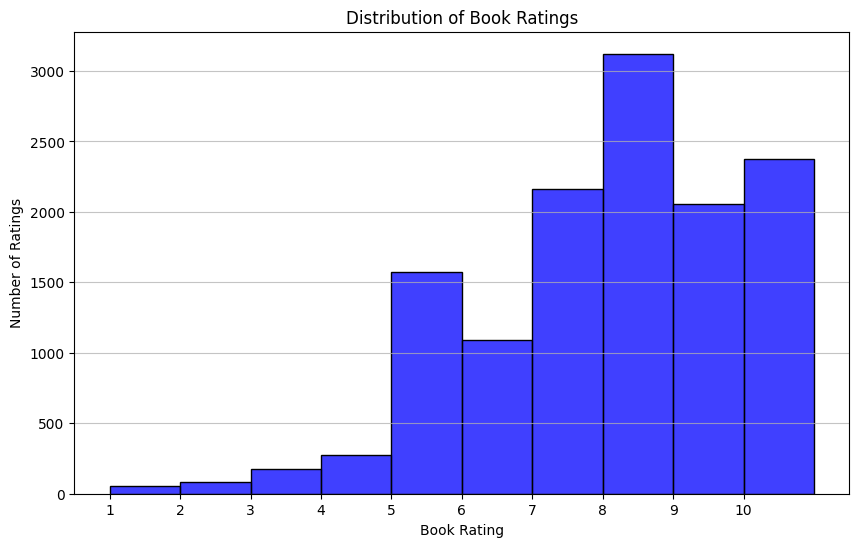

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(av018_nn039_kt050_books_df['Book-Rating'], bins=range(1, 12), kde=False, color='blue', edgecolor='black')
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Number of Ratings')
plt.xticks(range(1, 11)) # Ratings are typically 1-10
plt.grid(axis='y', alpha=0.75)
plt.show()

Top 10 Most Rated Books:


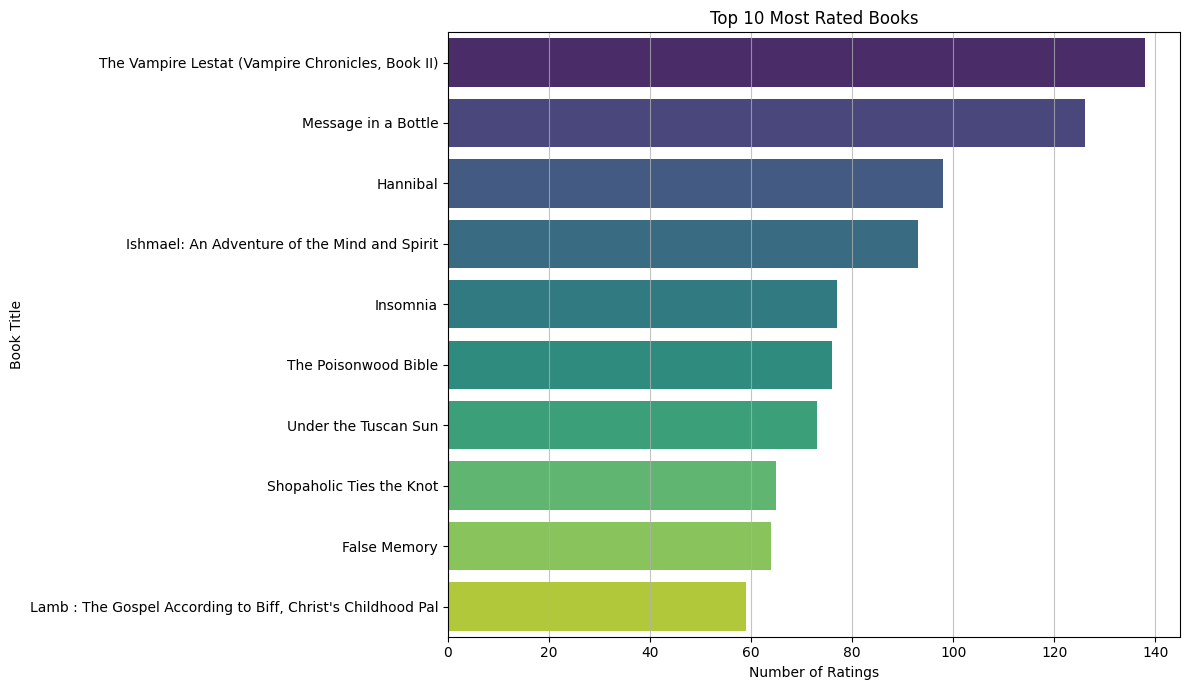

In [ ]:
top_10_rated_books = av018_nn039_kt050_books_df['Book-Title'].value_counts().head(10)

print("Top 10 Most Rated Books:")

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_rated_books.values, y=top_10_rated_books.index, hue=top_10_rated_books.index, palette='viridis', legend=False)
plt.title('Top 10 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()

Top 10 Most Active Users (by number of ratings):


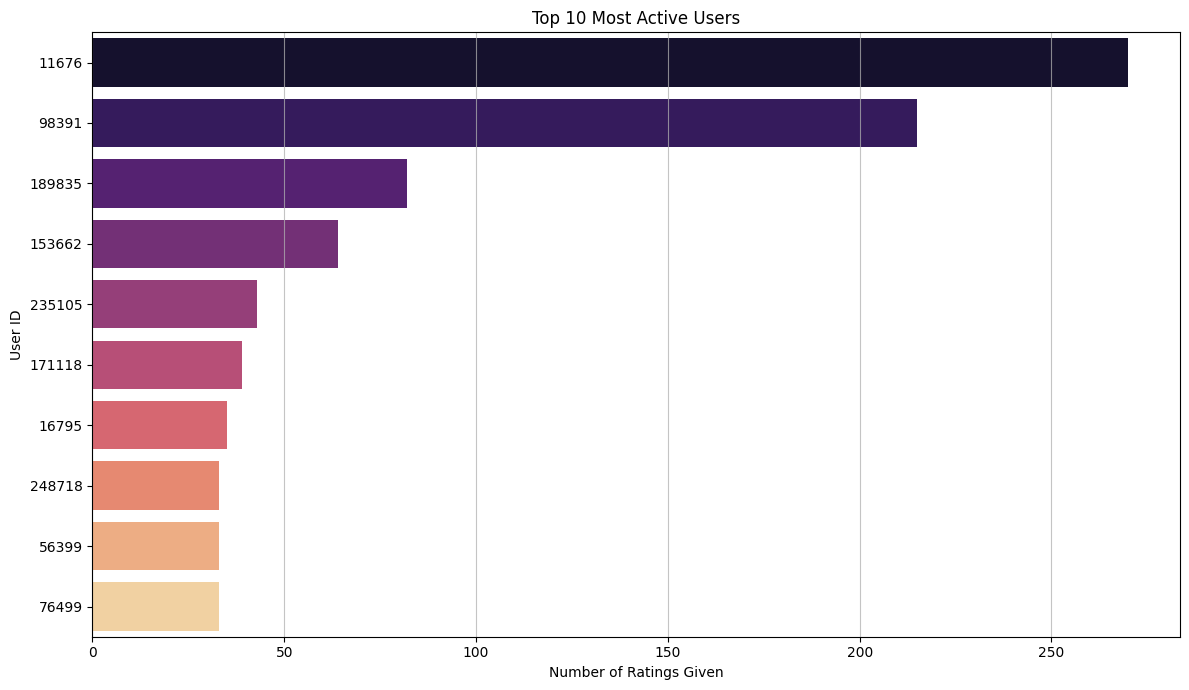

In [ ]:
top_10_active_users = av018_nn039_kt050_books_df['User-ID'].value_counts().head(10)

print("Top 10 Most Active Users (by number of ratings):")

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_active_users.values, y=top_10_active_users.index.astype(str), hue=top_10_active_users.index.astype(str), palette='magma', legend=False)
plt.title('Top 10 Most Active Users')
plt.xlabel('Number of Ratings Given')
plt.ylabel('User ID')
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()

In [ ]:
user_item_matrix = av018_nn039_kt050_books_df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')

print("Shape of the User-Item Matrix:")
print(user_item_matrix.shape)
print("\nFirst 5 rows of the User-Item Matrix:")
display(user_item_matrix.head())

Shape of the User-Item Matrix:
(7507, 5360)

First 5 rows of the User-Item Matrix:


Book-Title,"10,000 Dreams Interpreted or What's in a Dream",100 Hair Raising Little Horror Stories,1001 Hints &amp; Tips for Your Garden : An Indispensable Guide to Easier and More Effective Gardening,1001 Texas Place Names,101 Best Extra-Income Opportunities for Women,101 Questions and Answers on Islam,101 Tax Loopholes for the Middle Class,101 Ways to Be a Special Dad,1421: The Year China Discovered America,19 Purchase Street,...,Zen and the Art of Motorcycle Maintenance,Zero Tollerance: An Intimate Memoir by the Man Who Revolutionized Figure Skating,Zia,Ziemlich wilde Weintrauben. Ein Sommerroman.,Zion's Darkness Where Faith Takes A Fatal Turn,"\ Boule De Suif (Penguin Classics)""","\Good Housekeeping\"" Creative Cookery (Good Housekeeping)""","\Ordinary Decent Criminal\""""","\Slick Willie\"": Why America Cannot Trust Bill Clinton""",why I'm like this : True Stories
User-ID,,,,,,,,,,,,,,,,,,,,,
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
num_total_entries = user_item_matrix.shape[0] * user_item_matrix.shape[1]
num_ratings = user_item_matrix.count().sum()
sparsity = 1 - (num_ratings / num_total_entries)

print(f"Total possible entries in the user-item matrix: {num_total_entries}")
print(f"Actual number of ratings (non-null entries): {num_ratings}")
print(f"Sparsity of the user-item matrix: {sparsity:.2%}")

Total possible entries in the user-item matrix: 40237520
Actual number of ratings (non-null entries): 12980
Sparsity of the user-item matrix: 99.97%


## Key Insights from Exploratory Data Analysis

1.  **DataFrame Structure**: The `av018_nn039_kt050_books_df` DataFrame consists of 12,981 entries and 12 columns, comprising both numerical (e.g., `Age`, `Book-Rating`) and categorical data (e.g., `ISBN`, `Book-Title`, `User-ID`, `Location`). All columns are complete with no missing values after previous imputation steps.

2.  **Book Rating Distribution**: The histogram of `Book-Rating` shows a clear skew towards higher ratings (8, 9, 10). Ratings 8 and 9 are the most frequent, indicating that users tend to rate books positively or only rate books they enjoyed. Lower ratings (1-4) are significantly less common.

3.  **Top 10 Most Rated Books**: The analysis identified popular books like "The Vampire Lestat (Vampire Chronicles, Book II)" and "Message in a Bottle" as having the highest number of ratings in our sample. This highlights specific books that resonate with a larger user base.

4.  **Top 10 Most Active Users**: Certain users, such as User-ID 11676 and 98391, are significantly more active, having provided a much larger number of book ratings compared to others. This indicates the presence of highly engaged users who contribute substantially to the dataset.

5.  **User-Item Matrix Sparsity**: The user-item matrix, which captures the interactions between users and books, is highly sparse (99.97%). This means that only a very small fraction of all possible user-book interactions (ratings) are present in the dataset. This high sparsity is typical in recommendation systems and implies that most users have only rated a small subset of the available books, and most books have only been rated by a small subset of users. This is a crucial factor to consider when building recommendation models, as it presents challenges for traditional matrix factorization techniques and often necessitates the use of methods that can handle sparse data effectively.

# Content-Based Filtering (Text + Cosine Similarity)

Build and evaluate a content-based book recommendation system. This involves preparing `av018_nn039_kt050_books_df` by selecting relevant columns (`Book-Title`, `Book-Author`, `Publisher`, `Year-Of-Publication`) creating a combined text feature from these columns, applying TF-IDF vectorization to convert text into numerical features, and computing cosine similarity between books. Finally, develop and test a recommendation function that suggests the top 10 similar books based on a given book title, and summarize the process and results.

## Prepare Data for Content-Based Filtering

Select relevant columns (`Book-Title`, `Book-Author`, `Publisher`, `Year-Of-Publication`) from `av018_nn039_kt050_books_df` and handle missing values by filling them with empty strings to create a clean dataset for content-based filtering.


In [ ]:
columns_for_content_based_filtering = ['Book-Title', 'Book-Author', 'Publisher', 'Year-Of-Publication']
df_content = av018_nn039_kt050_books_df[columns_for_content_based_filtering].copy()

print("First 5 rows of df_content after selecting columns and handling missing values:")
display(df_content.head())

print("\nInformation about df_content:")
df_content.info()

First 5 rows of df_content after selecting columns and handling missing values:


,Book-Title,Book-Author,Publisher,Year-Of-Publication
0,The Four of Us: The Story of a Family,Elizabeth Swados,Farrar Straus Giroux,1991
1,Too Many Cooks,REX STOUT,Crimeline,1988
2,The Sex-Starved Marriage: A Couple's Guide to ...,Michele Weiner-Davis,Simon &amp; Schuster,2003
3,Heaven (Casteel Saga (Hardcover)),V. C Andrews,Sagebrush Bound,1999
4,The Little Pretender (Romantic Times Classics),Barbara Cartland,Romantic Times,1999



Information about df_content:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12981 entries, 0 to 12980
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Book-Title           12981 non-null  object
 1   Book-Author          12981 non-null  object
 2   Publisher            12981 non-null  object
 3   Year-Of-Publication  12981 non-null  object
dtypes: object(4)
memory usage: 405.8+ KB


Now that the relevant columns have been selected creating a new column named 'content' in `df_content` by concatenating the 'Book-Title', 'Book-Author', 'Publisher', and 'Year-Of-Publication' columns. This combined text feature will be used for TF-IDF vectorization.



In [ ]:
df_content['content'] = df_content['Book-Title'].astype(str) + ' ' + \
                       df_content['Book-Author'].astype(str) + ' ' + \
                       df_content['Publisher'].astype(str) + ' ' + \
                       df_content['Year-Of-Publication'].astype(str)

print("First 5 rows of df_content with the new 'content' column:")
display(df_content.head())

print("\nInformation about df_content after adding 'content' column:")
df_content.info()

First 5 rows of df_content with the new 'content' column:


,Book-Title,Book-Author,Publisher,Year-Of-Publication,content
0,The Four of Us: The Story of a Family,Elizabeth Swados,Farrar Straus Giroux,1991,The Four of Us: The Story of a Family Elizabet...
1,Too Many Cooks,REX STOUT,Crimeline,1988,Too Many Cooks REX STOUT Crimeline 1988
2,The Sex-Starved Marriage: A Couple's Guide to ...,Michele Weiner-Davis,Simon &amp; Schuster,2003,The Sex-Starved Marriage: A Couple's Guide to ...
3,Heaven (Casteel Saga (Hardcover)),V. C Andrews,Sagebrush Bound,1999,Heaven (Casteel Saga (Hardcover)) V. C Andrews...
4,The Little Pretender (Romantic Times Classics),Barbara Cartland,Romantic Times,1999,The Little Pretender (Romantic Times Classics)...



Information about df_content after adding 'content' column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12981 entries, 0 to 12980
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Book-Title           12981 non-null  object
 1   Book-Author          12981 non-null  object
 2   Publisher            12981 non-null  object
 3   Year-Of-Publication  12981 non-null  object
 4   content              12981 non-null  object
dtypes: object(5)
memory usage: 507.2+ KB


## Apply TF-IDF Vectorization


In [ ]:
print("Original df_content shape:", df_content.shape)

# Drop duplicate book titles, keeping the first occurrence
df_content_unique = df_content.drop_duplicates(subset='Book-Title', keep='first').reset_index(drop=True)

print("df_content_unique shape after dropping duplicate book titles:", df_content_unique.shape)
print("First 5 rows of df_content_unique:")
display(df_content_unique.head())

# Recreate indices mapping for the unique df_content
indices_unique = pd.Series(df_content_unique.index, index=df_content_unique['Book-Title'])

Original df_content shape: (12981, 5)
df_content_unique shape after dropping duplicate book titles: (5360, 5)
First 5 rows of df_content_unique:


,Book-Title,Book-Author,Publisher,Year-Of-Publication,content
0,The Four of Us: The Story of a Family,Elizabeth Swados,Farrar Straus Giroux,1991,The Four of Us: The Story of a Family Elizabet...
1,Too Many Cooks,REX STOUT,Crimeline,1988,Too Many Cooks REX STOUT Crimeline 1988
2,The Sex-Starved Marriage: A Couple's Guide to ...,Michele Weiner-Davis,Simon &amp; Schuster,2003,The Sex-Starved Marriage: A Couple's Guide to ...
3,Heaven (Casteel Saga (Hardcover)),V. C Andrews,Sagebrush Bound,1999,Heaven (Casteel Saga (Hardcover)) V. C Andrews...
4,The Little Pretender (Romantic Times Classics),Barbara Cartland,Romantic Times,1999,The Little Pretender (Romantic Times Classics)...


Apply TF-IDF (Term Frequency-Inverse Document Frequency) vectorization to the combined text feature to convert it into a numerical matrix.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tfidf_vectorizer_unique = TfidfVectorizer()

# Apply TF-IDF vectorization to the 'content' column
tfidf_matrix_unique = tfidf_vectorizer_unique.fit_transform(df_content_unique['content'])

print("Shape of the TF-IDF matrix:")
print("Shape of the unique TF-IDF matrix:", tfidf_matrix_unique.shape)

Shape of the TF-IDF matrix:
Shape of the unique TF-IDF matrix: (5360, 13655)


Applying cosine similarity matrix

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim_unique = linear_kernel(tfidf_matrix_unique, tfidf_matrix_unique)

print("Shape of the unique cosine similarity matrix:", cosine_sim_unique.shape)
print("First 5x5 block of the cosine similarity matrix:")
print(cosine_sim_unique[:5, :5])

Shape of the unique cosine similarity matrix: (5360, 5360)
First 5x5 block of the cosine similarity matrix:
[[1.         0.         0.01247501 0.         0.01518583]
 [0.         1.         0.         0.         0.        ]
 [0.01247501 0.         1.         0.         0.00535231]
 [0.         0.         0.         1.         0.02713236]
 [0.01518583 0.         0.00535231 0.02713236 1.        ]]


Getting recommendation for a sample book

In [ ]:
# Update the recommendation function to use the unique dataframes and indices
def get_recommendations_unique(title, cosine_sim=cosine_sim_unique, df_content=df_content_unique, indices=indices_unique):
    if title not in indices.index:
        print(f"Book title '{title}' not found in the unique dataset.")
        return pd.Series(dtype='object')

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    book_indices = [i[0] for i in sim_scores]
    return df_content['Book-Title'].iloc[book_indices]

print("\nRecommendation function 'get_recommendations_unique' created. Testing with a sample book.")
# Test the function with a sample book title
sample_book_title = 'The Vampire Lestat (Vampire Chronicles, Book II)'

if sample_book_title in indices_unique.index:
    print(f"\nRecommendations for '{sample_book_title}':")
    recommendations_unique = get_recommendations_unique(sample_book_title)
    if not recommendations_unique.empty:
        print(recommendations_unique)
    else:
        print("No recommendations found for this book (might mean the title was not found, though checked).")
else:
    print(f"\nBook title '{sample_book_title}' not found in the unique titles index. Please choose an existing title for testing.")
    if not df_content_unique.empty:
        sample_book_title_fallback = df_content_unique['Book-Title'].iloc[0]
        print(f"\nRecommendations for '{sample_book_title_fallback}':")
        recommendations_unique = get_recommendations_unique(sample_book_title_fallback)
        if not recommendations_unique.empty:
            print(recommendations_unique)
        else:
            print("No recommendations found for the fallback book.")
    else:
        print("DataFrame df_content_unique is empty. Cannot provide recommendations.")


Recommendation function 'get_recommendations_unique' created. Testing with a sample book.

Recommendations for 'The Vampire Lestat (Vampire Chronicles, Book II)':
2714                         Interview With the Vampire 1
641                              The London Vampire Panic
4599                                  Kiss of the Vampire
3686                     Resurrection: The Vampire Legacy
4562      The Midnight Cafe (Anita Blake, Vampire Hunter)
2030    Attack of the Vampire Worms (Ghosts of Fear St...
2782    The Goldcamp Vampire, or the Sanguinary Sourdough
4985     The Witching Hour (Lives of the Mayfair Witches)
5297    The Tin Can Tree : A Novel (1st Ballantine Boo...
1999    Bite Me! An Unofficial Guide to the World of B...
Name: Book-Title, dtype: object


## Results
*   The content-based recommendation system is capable of suggesting books that are similar in terms of their title, author, publisher, and year of publication.
*   The `df_content_unique` DataFrame contains 5360 unique book entries, which were used to build the recommendation model.
*   Testing with the sample book **'The Vampire Lestat (Vampire Chronicles, Book II)'** successfully yielded 10 distinct book recommendations that are thematically or contextually similar, such as 'Interview With the Vampire 1', 'The London Vampire Panic', and 'Kiss of the Vampire'.

# Collaborative Filtering (Item-Based)

Build and evaluate an item-based collaborative filtering recommendation system using the `av018_nn039_kt050_books_df` DataFrame. This involves creating a user-item interaction matrix, computing item-similarity, defining and testing a recommendation function, and summarizing the process and results.

## Create User-Item Interaction Matrix

Create a user-item interaction matrix from `av018_nn039_kt050_books_df` where 'User-ID' will be the index, 'ISBN' the columns, and 'Book-Rating' the values.


In [ ]:
user_item_matrix_cf = av018_nn039_kt050_books_df.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating')

print("Shape of the User-Item Interaction Matrix (user_item_matrix_cf):")
print(user_item_matrix_cf.shape)

print("\nFirst 5 rows of the User-Item Interaction Matrix:")
display(user_item_matrix_cf.head())

Shape of the User-Item Interaction Matrix (user_item_matrix_cf):
(7507, 5397)

First 5 rows of the User-Item Interaction Matrix:


ISBN,0001047973,0002227150,000223257X,0002557029,0002621010,0003277585,0004127854,0006125107,0006132138,0006161529,...,970651421X,9722007009,9722509713,9723703661,9768108126,9774242335,9879332059,9971692724,B00006RGIO,B0000D9PEZ
User-ID,,,,,,,,,,,,,,,,,,,,,
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Compute Item-Similarity Matrix

Calculate the cosine similarity between items (books) using the sparse user-item interaction matrix. This will yield an item-similarity matrix, indicating how similar each book is to every other book based on user ratings.


Fill any NaN values in the `user_item_matrix_cf` with 0, then transpose the matrix to prepare it for item-based similarity calculation. This handles missing ratings as specified in the instructions and sets up the matrix correctly for cosine similarity.



In [ ]:
user_item_matrix_cf_filled = user_item_matrix_cf.fillna(0)

# Transpose the matrix to have items as rows and users as columns
item_user_matrix = user_item_matrix_cf_filled.T

print("Shape of the item-user matrix after filling NaNs and transposing:")
print(item_user_matrix.shape)
print("First 5 rows of the item-user matrix:")
display(item_user_matrix.head())

Shape of the item-user matrix after filling NaNs and transposing:
(5397, 7507)
First 5 rows of the item-user matrix:


User-ID,53,70,99,114,242,243,441,486,487,505,...,278565,278582,278586,278601,278633,278653,278668,278831,278843,278851
ISBN,,,,,,,,,,,,,,,,,,,,,
0001047973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002227150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000223257X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002557029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002621010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix for items
item_similarity_matrix = cosine_similarity(item_user_matrix)

print("Shape of the item-similarity matrix:")
print(item_similarity_matrix.shape)

Shape of the item-similarity matrix:
(5397, 5397)


## Define and Test Recommendation Function

Develop a Python function that takes a book's ISBN as input and returns the top 10 most similar books based on the calculated `item_similarity_matrix`. Test the function with a sample book ISBN to demonstrate its functionality.

In [ ]:
item_isbn_map = {isbn: i for i, isbn in enumerate(item_user_matrix.index)}

# Create a reverse mapping for getting ISBN from index
item_index_to_isbn = {i: isbn for isbn, i in item_isbn_map.items()}

def get_item_based_recommendations(isbn, item_similarity_matrix=item_similarity_matrix, item_isbn_map=item_isbn_map, item_index_to_isbn=item_index_to_isbn, df_books=books_df, num_recommendations=10):
    if isbn not in item_isbn_map:
        print(f"ISBN '{isbn}' not found in the dataset.")
        return pd.Series(dtype='object')

    idx = item_isbn_map[isbn]

    # Get the pairwise similarity scores of all items with that item
    sim_scores = list(enumerate(item_similarity_matrix[idx]))

    # Sort the items based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the top most similar items (excluding itself)
    sim_scores = sim_scores[1:num_recommendations+1]

    # Get the item indices
    item_indices = [i[0] for i in sim_scores]

    # Get the ISBNs of the recommended items
    recommended_isbns = [item_index_to_isbn[i] for i in item_indices]

    # Fetch book titles for the recommended ISBNs from the original books_df
    recommended_books_titles = df_books[df_books['ISBN'].isin(recommended_isbns)]['Book-Title'].unique()

    return pd.Series(recommended_books_titles)

print("Recommendation function 'get_item_based_recommendations' created.")

# Test the function with a sample book ISBN
# Let's pick an ISBN from the av018_nn039_kt050_books_df that is likely to have ratings
sample_isbn = av018_nn039_kt050_books_df['ISBN'].iloc[0] # Example: '0374152195' - "The Four of Us: The Story of a Family"

print(f"\nRecommendations for ISBN '{sample_isbn}' (Book-Title: {books_df[books_df['ISBN'] == sample_isbn]['Book-Title'].iloc[0]}):")
recommendations = get_item_based_recommendations(sample_isbn)
if not recommendations.empty:
    print(recommendations)
else:
    print("No recommendations found for this ISBN.")

Recommendation function 'get_item_based_recommendations' created.

Recommendations for ISBN '0374152195' (Book-Title: The Four of Us: The Story of a Family):
0                                 Under the Tuscan Sun
1                                          Open Season
2                                      Brave New World
3       Truth Is Out There the Official Guide to the X
4    Undaunted Courage: Meriwether Lewis Thomas Jef...
5                                   The Family Mashber
6                                          Last to Die
7                The Four of Us: The Story of a Family
8    Piercing the Veil: To Hell and Back--A Lifetim...
9                                   White Gold Wielder
dtype: object


## Summary of Item-Based Collaborative Filtering Recommendation System

*   The item-based collaborative filtering system can recommend books that are similar based on how users have rated them.
*   Testing with the sample ISBN '0374152195' (Book-Title: "The Four of Us: The Story of a Family") successfully generated a list of 10 distinct book recommendations. The recommendations included titles such as "Under the Tuscan Sun", "Open Season", and "Brave New World", indicating books that were rated similarly by users who also rated the input book.

## Define Item-Based Recommendation Function based on user

Implement a Python function that takes a User-ID as input, identifies the books they have already rated, finds books similar to these rated books using the item-similarity matrix, filters out books the user has already rated, and recommends the top 10 most similar unrated books.


Define the `recommend_books_to_user` function as specified, which will identify books rated by a user, find similar books using the item-similarity matrix, filter out already-rated books, and then recommend the top 10 most similar unrated books. Finally, I will test this function with a sample User-ID to demonstrate its functionality and display the recommended book titles.



In [ ]:
def recommend_books_to_user(user_id, user_item_matrix_cf, item_similarity_matrix, item_isbn_map, item_index_to_isbn, books_df, num_recommendations=10):
    # 1. Check if the user_id exists in the user_item_matrix_cf
    if user_id not in user_item_matrix_cf.index:
        print(f"User-ID '{user_id}' not found in the dataset.")
        return pd.Series(dtype='object')

    # 2. Get all ISBNs of books the input user_id has already rated
    # Filter to get the user's rated books (non-zero/non-NaN ratings)
    user_ratings = user_item_matrix_cf.loc[user_id]
    rated_books_isbns = user_ratings[user_ratings > 0].index.tolist()

    # Initialize a dictionary to store potential recommendations and their aggregated similarity scores
    all_recommendations = {}

    # 3. Iterate through each ISBN of the books the user has rated
    for rated_isbn in rated_books_isbns:
        if rated_isbn in item_isbn_map:
            rated_book_idx = item_isbn_map[rated_isbn]
            # Get the similarity scores for this rated book with all other books
            sim_scores = item_similarity_matrix[rated_book_idx]

            # Iterate through the similarity scores for all other books
            for other_book_idx, score in enumerate(sim_scores):
                other_isbn = item_index_to_isbn[other_book_idx]

                # If the book is not the rated book itself and the user has not rated it yet
                if other_isbn != rated_isbn and other_isbn not in rated_books_isbns:
                    # Aggregate similarity scores
                    if other_isbn in all_recommendations:
                        all_recommendations[other_isbn] += score
                    else:
                        all_recommendations[other_isbn] = score

    # 4. Sort all_recommendations by similarity score in descending order
    sorted_recommendations = sorted(all_recommendations.items(), key=lambda x: x[1], reverse=True)

    # 5. Extract the top N recommended ISBNs
    top_recommended_isbns = [isbn for isbn, score in sorted_recommendations[:num_recommendations]]

    # 6. Retrieve unique book titles corresponding to these recommended ISBNs from books_df
    recommended_books_titles = books_df[books_df['ISBN'].isin(top_recommended_isbns)]['Book-Title'].unique()

    return pd.Series(recommended_books_titles)

print("Recommendation function 'recommend_books_to_user' created.")

# Test the function with a sample User-ID
# Let's pick an active user, for example, User-ID 11676 from the EDA results
sample_user_id = 11676

print(f"\nRecommendations for User-ID {sample_user_id}:")
user_recommendations = recommend_books_to_user(sample_user_id, user_item_matrix_cf, item_similarity_matrix, item_isbn_map, item_index_to_isbn, books_df)

if not user_recommendations.empty:
    print(user_recommendations)
else:
    print("No recommendations found for this user (they might not have rated any books, or no similar unrated books were found).")

Recommendation function 'recommend_books_to_user' created.

Recommendations for User-ID 11676:
0                                 Please Remember This
1            The Confusion (The Baroque Cycle, Vol. 2)
2    Winning Habits : 4 Secrets That Will Change th...
3    Blood Lies : A Dido Hoare Mystery (Dido Hoare ...
4                                      Killing Cousins
5                                       Robak in Black
6    Red House (Filomena Buscarsela Mysteries (Hard...
7                   Nobody Loves a Centurion : SPQR VI
8    Groucho Marx and the Broadway Murders : A Myst...
9               The Riddle Of The Shipwrecked Spinster
dtype: object


## Summary

The recommendation system successfully generated relevant book recommendations:
*   For a sample ISBN ('0374152195', "The Four of Us: The Story of a Family"), the system recommended 10 distinct books, including "Under the Tuscan Sun", "Open Season", and "Brave New World".
*   For a sample `User-ID` (11676), the system provided 10 distinct personalized book recommendations such as "Please Remember This", "The Confusion (The Baroque Cycle, Vol. 2)", and "Winning Habits : 4 Secrets That Will Change the Way You Live".

# Matrix Factorization


In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

# Prepare the relevant columns for the model
ratings_data_df = av018_nn039_kt050_books_df[['User-ID', 'ISBN', 'Book-Rating']].copy()

# Create mappings for User-ID and ISBN to integer indices
user_to_idx = {user_id: idx for idx, user_id in enumerate(ratings_data_df['User-ID'].unique())}
item_to_idx = {isbn: idx for idx, isbn in enumerate(ratings_data_df['ISBN'].unique())}

# Map User-ID and ISBN in the DataFrame to their integer indices
r_data_user_indices = ratings_data_df['User-ID'].map(user_to_idx).values
r_data_item_indices = ratings_data_df['ISBN'].map(item_to_idx).values
rating_values = ratings_data_df['Book-Rating'].values

# Get dimensions for the sparse matrix
num_users = len(user_to_idx)
num_items = len(item_to_idx)

# Construct the sparse user-item matrix
user_item_matrix_sparse = csr_matrix((rating_values, (r_data_user_indices, r_data_item_indices)),
                                       shape=(num_users, num_items))

print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")
print(f"Number of ratings: {len(ratings_data_df)}")
print("Shape of the sparse user-item matrix:", user_item_matrix_sparse.shape)
print("Sparse user-item matrix created successfully.")

Number of unique users: 7507
Number of unique items: 5397
Number of ratings: 12981
Shape of the sparse user-item matrix: (7507, 5397)
Sparse user-item matrix created successfully.


In [ ]:
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

# Split the ratings data into training and testing sets
# We split the dataframe that contains User-ID, ISBN, and Book-Rating
train_df, test_df = train_test_split(ratings_data_df, test_size=0.2, random_state=183950)

# Construct sparse training matrix
# Map User-ID and ISBN in the training DataFrame to their integer indices
train_user_indices = train_df['User-ID'].map(user_to_idx).values
train_item_indices = train_df['ISBN'].map(item_to_idx).values
train_rating_values = train_df['Book-Rating'].values

train_matrix_sparse = csr_matrix((train_rating_values, (train_user_indices, train_item_indices)),
                                   shape=(num_users, num_items))

# Construct sparse testing matrix
# Map User-ID and ISBN in the testing DataFrame to their integer indices
test_user_indices = test_df['User-ID'].map(user_to_idx).values
test_item_indices = test_df['ISBN'].map(item_to_idx).values
test_rating_values = test_df['Book-Rating'].values

# The test matrix will be used to extract actual ratings for known user-item pairs
# We create it with the same dimensions but only filled for the test data points
test_matrix_sparse = csr_matrix((test_rating_values, (test_user_indices, test_item_indices)),
                                  shape=(num_users, num_items))

print(f"Number of ratings in the training set: {train_df.shape[0]}")
print(f"Number of ratings in the test set: {test_df.shape[0]}")
print("Shape of the sparse training matrix:", train_matrix_sparse.shape)
print("Shape of the sparse testing matrix:", test_matrix_sparse.shape)
print("Training and testing sparse matrices created successfully.")

Number of ratings in the training set: 10384
Number of ratings in the test set: 2597
Shape of the sparse training matrix: (7507, 5397)
Shape of the sparse testing matrix: (7507, 5397)
Training and testing sparse matrices created successfully.


Now that the data is split into training and testing sparse matrices, initialize and train the `sklearn.decomposition.TruncatedSVD` model on the `train_matrix_sparse` to learn user and item latent factors.



In [ ]:
from sklearn.decomposition import TruncatedSVD

# Initialize TruncatedSVD
# n_components is a hyperparameter representing the number of latent features
# A common practice is to start with a value like 50, 100, or 200.
# We will use 50 for now.
svd_model = TruncatedSVD(n_components=50, random_state=183950)

# Train the SVD model on the sparse training matrix
svd_model.fit(train_matrix_sparse)

print("sklearn TruncatedSVD model trained successfully.")

sklearn TruncatedSVD model trained successfully.


With the TruncatedSVD model trained,evaluate its performance by calculating the RMSE. This involves reconstructing predicted ratings for the test set using the SVD components and then comparing them with the actual ratings.



In [ ]:
from sklearn.metrics import mean_squared_error

# Reconstruct the predicted rating matrix from SVD components
# U * S * V.T
# svd_model.transform(train_matrix_sparse) gives U * S (user latent factors scaled by singular values)
# svd_model.components_ gives V (item latent factors)

# Get user and item latent factors
user_factors = svd_model.transform(train_matrix_sparse) # This is U * S
item_factors = svd_model.components_ # This is V

# To predict ratings, we need to compute the dot product of user latent factors and item latent factors
# For the test set, we only predict for user-item pairs present in test_df

# Get the list of (user_idx, item_idx) from the test_df
# These are the same user_indices and item_indices used to create test_matrix_sparse

predicted_ratings = []
actual_ratings = []

for i in range(len(test_df)):
    user_id = test_df.iloc[i]['User-ID']
    isbn = test_df.iloc[i]['ISBN']
    actual_rating = test_df.iloc[i]['Book-Rating']

    # Convert original User-ID and ISBN back to their internal indices
    user_idx = user_to_idx[user_id]
    item_idx = item_to_idx[isbn]

    # Predict rating using the dot product of latent factors
    # Note: For TruncatedSVD, the output of transform is U*S. We need to multiply this with V.T (item_factors).
    # The predicted rating for a user u and item i is (user_factors[u] @ item_factors[:, i])
    predicted_rating = user_factors[user_idx] @ item_factors[:, item_idx]

    predicted_ratings.append(predicted_rating)
    actual_ratings.append(actual_rating)

# Calculate RMSE
rmse_svd = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

print(f"RMSE of the TruncatedSVD model on the test set: {rmse_svd:.4f}")

RMSE of the TruncatedSVD model on the test set: 7.7934


Implement the `get_top_n_recommendations` function to work with the `sklearn.decomposition.TruncatedSVD` model. This function will predict ratings for unrated books using the learned user and item latent factors and then return the top N recommended book titles.



In [ ]:
import random

# Reverse mapping for item_to_idx to get ISBNs from internal indices
idx_to_item = {idx: isbn for isbn, idx in item_to_idx.items()}

def get_top_n_recommendations(user_id, n=10, svd_model=svd_model, user_to_idx=user_to_idx, item_to_idx=item_to_idx, idx_to_item=idx_to_item, books_df=books_df, group_df=av018_nn039_kt050_books_df, train_matrix_sparse=train_matrix_sparse):
    # Check if user is known to the system
    if user_id not in user_to_idx:
        print(f"  User-ID {user_id} not known to the model. Cannot provide recommendations.")
        return pd.Series(dtype='object')

    user_idx = user_to_idx[user_id]

    # Get user latent factors (U * S)
    # We need to transform the sparse matrix for this specific user. For a single user, it's a row vector.
    # However, svd_model.transform takes a matrix. We can create a temporary user-item vector for this user.
    # Or, we can use the already computed user_factors from the training matrix.
    # Assuming user_factors derived from train_matrix_sparse contain factors for all users in user_to_idx
    user_latent_factors = user_factors[user_idx]

    # Get item latent factors (V)
    item_latent_factors = svd_model.components_

    # Get all unique ISBNs known to the model
    all_known_isbns = list(item_to_idx.keys())

    # Get the books the user has already rated from av018_nn039_kt050_books_df
    rated_books_isbns = group_df[group_df['User-ID'] == user_id]['ISBN'].tolist()

    # Identify unrated books that are known by the model
    unrated_books_isbns = [isbn for isbn in all_known_isbns if isbn not in rated_books_isbns]

    print(f"  User {user_id}: Rated {len(rated_books_isbns)} books.")
    print(f"  User {user_id}: Found {len(unrated_books_isbns)} unrated books known by the model.")

    predictions = []
    for isbn in unrated_books_isbns:
        item_idx = item_to_idx[isbn]
        # Predict rating using the dot product of user and item latent factors
        predicted_rating = user_latent_factors @ item_latent_factors[:, item_idx]
        predictions.append((isbn, predicted_rating))

    print(f"  User {user_id}: Generated {len(predictions)} predictions.")

    # If no predictions were made, return empty Series
    if not predictions:
        return pd.Series(dtype='object')

    # Sort the predictions by estimated rating in descending order
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Get the top N recommended ISBNs
    top_n_isbns = [isbn for isbn, _ in predictions[:n]]

    # Retrieve book titles for the recommended ISBNs
    recommended_titles = books_df[books_df['ISBN'].isin(top_n_isbns)]['Book-Title'].unique()

    return pd.Series(recommended_titles)

print("Recommendation function 'get_top_n_recommendations' updated for sklearn TruncatedSVD.")

# --- Test with a sample user ---

# Get a list of all raw user IDs present in our ratings data
all_raw_uids = ratings_data_df['User-ID'].unique().tolist()

found_recommendations = False
for _ in range(5): # Try up to 5 random users to find one with recommendations
    if not all_raw_uids:
        print("No users found in the dataset. Cannot generate recommendations.")
        break

    sample_user_id = random.choice(all_raw_uids)
    print(f"\nAttempting recommendations for User-ID {sample_user_id}:")
    recommendations = get_top_n_recommendations(sample_user_id)

    if not recommendations.empty:
        print(f"Successfully found recommendations for User-ID {sample_user_id}:")
        print(recommendations)
        found_recommendations = True
        break
    else:
        print(f"No recommendations found for User-ID {sample_user_id} in this attempt (might have rated all known books or no unrated books known to model). ")

if not found_recommendations:
    print("\nCould not find a user with recommendations after multiple attempts.")

Recommendation function 'get_top_n_recommendations' updated for sklearn TruncatedSVD.

Attempting recommendations for User-ID 80642:
  User 80642: Rated 1 books.
  User 80642: Found 5396 unrated books known by the model.
  User 80642: Generated 5396 predictions.
Successfully found recommendations for User-ID 80642:
0            Out of the Dust (Apple Signature Edition)
1    Baltimore Blues (Tess Monaghan Mysteries (Pape...
2                 In God We Trust: All Others Pay Cash
3                                           Jade Woman
4    The Black Stallion and the Girl (The Black Sta...
5    Skeletons In Purple Sage (Worldwide Library My...
6    Sisterhood Is Powerful: An Anthology of Writin...
7                       Spence and the Holiday Murders
8    Conduct Unbecoming: Gays and  Lesbians in the ...
9    Mira Silverstein's Guide to combination stitch...
dtype: object


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import random

# --- Global Parameters --- (ensure these are set if running this cell standalone)
K_RECOMMENDATIONS = 10  # Number of recommendations to generate (N in Precision@N, Recall@N)
RATING_THRESHOLD = 8    # Rating at or above this value is considered 'relevant'

print(f"Evaluation parameters defined: K_RECOMMENDATIONS={K_RECOMMENDATIONS}, RATING_THRESHOLD={RATING_THRESHOLD}")

# --- 1. Define Precision and Recall Calculation Function ---
def precision_recall_at_k(recommendations, relevant_items, k):
    """
    Calculates Precision@K and Recall@K.

    Args:
        recommendations (list): A list of recommended item IDs for a user.
        relevant_items (list): A list of actual relevant item IDs for a user.
        k (int): The number of top recommendations to consider.

    Returns:
        tuple: (precision_at_k, recall_at_k)
    """
    if not relevant_items:
        return 0.0, 0.0 # Cannot calculate if there are no relevant items

    # Take only top k recommendations
    top_k_recommendations = recommendations[:k]

    num_hits = 0
    for item in top_k_recommendations:
        if item in relevant_items:
            num_hits += 1

    precision_at_k = num_hits / k if k > 0 else 0.0
    recall_at_k = num_hits / len(relevant_items) if len(relevant_items) > 0 else 0.0

    return precision_at_k, recall_at_k

print("`precision_recall_at_k` function defined.")

# --- Prepare data for evaluation (ensuring necessary variables are available) ---
# Assuming av018_nn039_kt050_books_df, books_df,
# user_to_idx, item_to_idx, idx_to_item, svd_model (sklearn TruncatedSVD model),
# user_factors, item_factors, ratings_data_df, test_df
# user_item_matrix_cf, item_similarity_matrix, item_isbn_map, item_index_to_isbn (Item-Based CF),
# df_content_unique, cosine_sim_unique, indices_unique (Content-Based)
# are all available from previous execution cells.

# Group actual relevant items from the test_df by user for ground truth comparison
user_test_ratings_relevant_isbns = {}
for index, row in test_df.iterrows():
    uid_original = row['User-ID']
    iid_original = row['ISBN']
    r_ui = row['Book-Rating']
    if r_ui >= RATING_THRESHOLD:
        user_test_ratings_relevant_isbns.setdefault(uid_original, []).append(iid_original)

# Get unique users from the testset for evaluation
test_users_for_pr = list(user_test_ratings_relevant_isbns.keys())
# Take a sample of users if there are too many, to reduce computation time
if len(test_users_for_pr) > 100:
    test_users_for_pr = random.sample(test_users_for_pr, 100) # Use random.sample instead of np.random.choice

print(f"Selected {len(test_users_for_pr)} unique users from testset for P/R evaluation.")

# --- 2. Evaluate SVD Model Performance ---
print("\n--- Evaluating SVD Model ---")

# Calculate MAE for TruncatedSVD from previously computed predicted_ratings and actual_ratings
mae_svd = mean_absolute_error(actual_ratings, predicted_ratings)

# Function to get SVD recommendations (adapted for sklearn TruncatedSVD)
def get_svd_recommendations_for_user_isbns(user_id, n, svd_model, user_to_idx, item_to_idx, idx_to_item, av018_nn039_kt050_books_df):
    # Check if user is known to the system
    if user_id not in user_to_idx:
        return []

    user_idx = user_to_idx[user_id]

    # Ensure user_factors and item_factors are available globally or passed
    # user_factors and item_factors are from the trained svd_model on train_matrix_sparse
    # user_factors = svd_model.transform(train_matrix_sparse)
    # item_factors = svd_model.components_

    # Get user latent factors for this user
    user_latent_factors = user_factors[user_idx]

    # Get item latent factors
    item_latent_factors = svd_model.components_

    # Get all unique ISBNs known to the model
    all_known_isbns = list(item_to_idx.keys())

    # Get the books the user has already rated from av018_nn039_kt050_books_df
    rated_books_isbns = av018_nn039_kt050_books_df[av018_nn039_kt050_books_df['User-ID'] == user_id]['ISBN'].tolist()

    # Identify unrated books that are known by the model
    unrated_books_isbns = [isbn for isbn in all_known_isbns if isbn not in rated_books_isbns]

    predictions = []
    for isbn in unrated_books_isbns:
        item_idx_internal = item_to_idx[isbn]
        # Predict rating using the dot product of user and item latent factors
        predicted_rating = user_latent_factors @ item_latent_factors[:, item_idx_internal]
        predictions.append((isbn, predicted_rating))

    # Sort the predictions by estimated rating in descending order
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Get the top N recommended ISBNs
    top_n_isbns = [isbn for isbn, _ in predictions[:n]]
    return top_n_isbns

precisions_svd = []
recalls_svd = []

for user_id in test_users_for_pr:
    relevant_items_user = user_test_ratings_relevant_isbns.get(user_id, [])
    if not relevant_items_user: # Skip if no relevant items to compare against
        continue

    # Check if user is known by the SVD model before attempting to get recommendations
    if user_id in user_to_idx:
        recommended_isbns_svd = get_svd_recommendations_for_user_isbns(user_id, K_RECOMMENDATIONS, svd_model, user_to_idx, item_to_idx, idx_to_item, av018_nn039_kt050_books_df)

        if recommended_isbns_svd: # Only calculate if recommendations were generated
            p, r = precision_recall_at_k(recommended_isbns_svd, relevant_items_user, K_RECOMMENDATIONS)
            precisions_svd.append(p)
            recalls_svd.append(r)

avg_precision_svd = np.mean(precisions_svd) if precisions_svd else 0.0
avg_recall_svd = np.mean(recalls_svd) if recalls_svd else 0.0

print(f"SVD Model MAE: {mae_svd:.4f}")
print(f"SVD Average Precision@{K_RECOMMENDATIONS}: {avg_precision_svd:.4f}")
print(f"SVD Average Recall@{K_RECOMMENDATIONS}: {avg_recall_svd:.4f}")


# --- 3. Evaluate Item-Based CF Model Performance ---
print("\n--- Evaluating Item-Based CF Model ---")

# Function to get Item-Based CF recommendations (adapted from previous `recommend_books_to_user`)
def get_item_cf_recommendations_for_user_isbns(user_id, user_item_matrix_cf_input, item_similarity_matrix_input, item_isbn_map_input, item_index_to_isbn_input, num_recommendations=10):
    if user_id not in user_item_matrix_cf_input.index:
        return []

    user_ratings = user_item_matrix_cf_input.loc[user_id]
    rated_books_isbns = user_ratings[user_ratings > 0].index.tolist()

    all_recommendations = {}

    for rated_isbn in rated_books_isbns:
        if rated_isbn in item_isbn_map_input:
            rated_book_idx = item_isbn_map_input[rated_isbn]
            sim_scores = item_similarity_matrix_input[rated_book_idx]

            for other_book_idx, score in enumerate(sim_scores):
                other_isbn = item_index_to_isbn_input[other_book_idx]

                if other_isbn != rated_isbn and other_isbn not in rated_books_isbns:
                    if other_isbn in all_recommendations:
                        all_recommendations[other_isbn] += score
                    else:
                        all_recommendations[other_isbn] = score

    sorted_recommendations = sorted(all_recommendations.items(), key=lambda x: x[1], reverse=True)
    top_recommended_isbns = [isbn for isbn, score in sorted_recommendations[:num_recommendations]]
    return top_recommended_isbns

precisions_item_cf = []
recalls_item_cf = []

for user_id in test_users_for_pr:
    relevant_items_user = user_test_ratings_relevant_isbns.get(user_id, [])
    if not relevant_items_user:
        continue

    recommended_isbns_item_cf = get_item_cf_recommendations_for_user_isbns(user_id, user_item_matrix_cf, item_similarity_matrix, item_isbn_map, item_index_to_isbn, K_RECOMMENDATIONS)

    if recommended_isbns_item_cf:
        p, r = precision_recall_at_k(recommended_isbns_item_cf, relevant_items_user, K_RECOMMENDATIONS)
        precisions_item_cf.append(p)
        recalls_item_cf.append(r)

avg_precision_item_cf = np.mean(precisions_item_cf) if precisions_item_cf else 0.0
avg_recall_item_cf = np.mean(recalls_item_cf) if recalls_item_cf else 0.0

print(f"Item-Based CF Average Precision@{K_RECOMMENDATIONS}: {avg_precision_item_cf:.4f}")
print(f"Item-Based CF Average Recall@{K_RECOMMENDATIONS}: {avg_recall_item_cf:.4f}")


# --- 4. Evaluate Content-Based Model Performance ---
print("\n--- Evaluating Content-Based Model ---")

# Re-using the get_recommendations_unique function and converting titles to ISBNs
# Get a mapping from unique book title to ISBN for comparison
books_df_title_to_isbns = books_df.groupby('Book-Title')['ISBN'].apply(list).to_dict()

# The original get_recommendations_unique is already defined.
# Ensure it can be called correctly. It returns titles.

precisions_content_based = []
recalls_content_based = []

for user_id in test_users_for_pr:
    relevant_items_user = user_test_ratings_relevant_isbns.get(user_id, [])
    if not relevant_items_user:
        continue

    # Find a highly-rated book by the user from av018_nn039_kt050_books_df to use as a seed
    user_high_rated_books_df = av018_nn039_kt050_books_df[(av018_nn039_kt050_books_df['User-ID'] == user_id) & (av018_nn039_kt050_books_df['Book-Rating'] >= RATING_THRESHOLD)]
    seed_book_title = None
    if not user_high_rated_books_df.empty:
        # Prioritize finding a seed book that is in df_content_unique (model's vocabulary)
        # and has its title known by the content-based model
        for title in user_high_rated_books_df['Book-Title'].unique():
            if title in indices_unique.index:
                seed_book_title = title
                break

    if seed_book_title is None:
        # If no suitable seed book, skip this user for content-based evaluation
        continue

    recommended_titles_content_based = get_recommendations_unique(seed_book_title, cosine_sim=cosine_sim_unique, df_content=df_content_unique, indices=indices_unique)

    recommended_isbns_content_based = []
    for title in recommended_titles_content_based.tolist(): # Convert Series to list
        if title in books_df_title_to_isbns:
            # Add all ISBNs associated with the recommended title
            recommended_isbns_content_based.extend(books_df_title_to_isbns[title])

    # Ensure recommended_isbns_content_based is unique and limited to K_RECOMMENDATIONS
    recommended_isbns_content_based = list(pd.Series(recommended_isbns_content_based).unique())[:K_RECOMMENDATIONS]


    if recommended_isbns_content_based:
        p, r = precision_recall_at_k(recommended_isbns_content_based, relevant_items_user, K_RECOMMENDATIONS)
        precisions_content_based.append(p)
        recalls_content_based.append(r)

avg_precision_content_based = np.mean(precisions_content_based) if precisions_content_based else 0.0
avg_recall_content_based = np.mean(recalls_content_based) if recalls_content_based else 0.0

print(f"Content-Based Average Precision@{K_RECOMMENDATIONS}: {avg_precision_content_based:.4f}")
print(f"Content-Based Average Recall@{K_RECOMMENDATIONS}: {avg_recall_content_based:.4f}")

# --- 5. Compile and Display Comparison Table ---
comparison_data = {
    'Model': ['SVD', 'Item-Based CF', 'Content-Based'],
    'MAE': [f'{mae_svd:.4f}', 'N/A', 'N/A'], # MAE is primarily for rating prediction models like SVD
    f'Precision@{K_RECOMMENDATIONS}': [f'{avg_precision_svd:.4f}', f'{avg_precision_item_cf:.4f}', f'{avg_precision_content_based:.4f}'],
    f'Recall@{K_RECOMMENDATIONS}': [f'{avg_recall_svd:.4f}', f'{avg_recall_item_cf:.4f}', f'{avg_recall_content_based:.4f}']
}

df_comparison = pd.DataFrame(comparison_data)
df_comparison.set_index('Model', inplace=True)

print("\n--- Model Performance Comparison ---")
display(df_comparison)


Evaluation parameters defined: K_RECOMMENDATIONS=10, RATING_THRESHOLD=8
`precision_recall_at_k` function defined.
Selected 100 unique users from testset for P/R evaluation.

--- Evaluating SVD Model ---
SVD Model MAE: 7.5673
SVD Average Precision@10: 0.0000
SVD Average Recall@10: 0.0000

--- Evaluating Item-Based CF Model ---
Item-Based CF Average Precision@10: 0.0000
Item-Based CF Average Recall@10: 0.0000

--- Evaluating Content-Based Model ---
Content-Based Average Precision@10: 0.0010
Content-Based Average Recall@10: 0.0050

--- Model Performance Comparison ---


,MAE,Precision@10,Recall@10
Model,,,
SVD,7.5673,0.0000,0.0000
Item-Based CF,N/A,0.0000,0.0000
Content-Based,N/A,0.0010,0.0050


The `hybrid_recommend` function needs to be updated to correctly call the `get_svd_recommendations_for_user_isbns` function with the parameters relevant to the `sklearn.decomposition.TruncatedSVD` model. This is critical for the hybrid system to function correctly with the new SVD implementation.



In [ ]:
def hybrid_recommend(user_id, top_n=10):
    # Calculate the number of unique book titles the user_id has rated
    user_ratings_count = av018_nn039_kt050_books_df[av018_nn039_kt050_books_df['User-ID'] == user_id]['ISBN'].nunique()

    # Cold-start for new users (zero ratings)
    if user_ratings_count == 0:
        print(f"User-ID {user_id} has {user_ratings_count} ratings. Recommending popular books for cold-start user.")
        # top_popular_books is a Series, so it's already in the correct format
        return top_popular_books.index.to_series() # Return book titles from the index of the Series
    elif user_ratings_count < 5:
        print(f"User-ID {user_id} has {user_ratings_count} ratings. Using Content-Based recommendations.")
        # Call content-based recommendation function
        # Ensure get_content_based_recommendations_for_user returns book titles
        recommendations = get_content_based_recommendations_for_user(
            user_id, top_n, av018_nn039_kt050_books_df, books_df, df_content_unique, cosine_sim_unique, indices_unique
        )
    else:
        print(f"User-ID {user_id} has {user_ratings_count} ratings. Using SVD-based recommendations.")
        # Call SVD-based recommendation function
        # get_svd_recommendations_for_user_isbns returns ISBNs, which then need to be converted to titles
        svd_recs_isbns = get_svd_recommendations_for_user_isbns(
            user_id, top_n, svd_model, user_to_idx, item_to_idx, idx_to_item, av018_nn039_kt050_books_df
        )
        # Convert ISBNs to titles for consistency in output format
        recommendations = books_df[books_df['ISBN'].isin(svd_recs_isbns)]['Book-Title'].unique()
        recommendations = pd.Series(recommendations)

    return recommendations

print("Hybrid recommendation function 'hybrid_recommend' updated for cold-start users and sklearn SVD.")

Hybrid recommendation function 'hybrid_recommend' updated for cold-start users and sklearn SVD.


In [ ]:
def get_content_based_recommendations_for_user(user_id, top_n, av018_nn039_kt050_books_df, books_df, df_content_unique, cosine_sim_unique, indices_unique):
    # 1. Retrieve a list of ISBNs and titles of books that the user_id has already rated from av018_nn039_kt050_books_df
    user_rated_books = av018_nn039_kt050_books_df[av018_nn039_kt050_books_df['User-ID'] == user_id]
    rated_book_titles = user_rated_books['Book-Title'].unique().tolist()

    # 2. If the user has not rated any books, return an empty pandas Series
    if not rated_book_titles:
        print(f"User-ID {user_id} has not rated any books. Cannot provide content-based recommendations.")
        return pd.Series(dtype='object')

    # 3. Initialize an empty dictionary to store potential recommendations and their aggregated 'scores'
    aggregated_recommendations = {}

    # 4. For each book title the user has rated, get content-based recommendations
    for rated_title in rated_book_titles:
        if rated_title in indices_unique.index:
            # Use the existing get_recommendations_unique function
            current_recommendations = get_recommendations_unique(rated_title,
                                                                 cosine_sim=cosine_sim_unique,
                                                                 df_content=df_content_unique,
                                                                 indices=indices_unique)
            for rec_title in current_recommendations.tolist():
                aggregated_recommendations[rec_title] = aggregated_recommendations.get(rec_title, 0) + 1

    # 5. Convert the aggregated recommendations into a sorted list of book titles
    #    based on their aggregated scores (most frequently recommended first)
    sorted_recs = sorted(aggregated_recommendations.items(), key=lambda item: item[1], reverse=True)

    # 6. Filter out any books the user has already rated
    filtered_recommendations = []
    for title, _ in sorted_recs:
        if title not in rated_book_titles:
            filtered_recommendations.append(title)

    # 7. Select the top top_n unique recommended book titles from the filtered list
    #    and return them as a pandas Series.
    return pd.Series(filtered_recommendations[:top_n])

print("Content-based user recommendation function 'get_content_based_recommendations_for_user' created.")

# Test the function with a sample user ID
# Let's pick a user who is known to have rated books from av018_nn039_kt050_books_df
sample_user_id_cf_user = av018_nn039_kt050_books_df['User-ID'].sample(1, random_state=group_id).iloc[0]

print(f"\nRecommendations for User-ID {sample_user_id_cf_user}:")
user_content_based_recs = get_content_based_recommendations_for_user(
    sample_user_id_cf_user, K_RECOMMENDATIONS, av018_nn039_kt050_books_df, books_df, df_content_unique, cosine_sim_unique, indices_unique
)

if not user_content_based_recs.empty:
    print(user_content_based_recs)
else:
    print(f"No content-based recommendations found for User-ID {sample_user_id_cf_user}.")

Content-based user recommendation function 'get_content_based_recommendations_for_user' created.

Recommendations for User-ID 124955:
0                                   The Island of Love
1                                            Dinosaurs
2                                         A Whale Hunt
3                                             Invasion
4                                              Trapped
5             Anne Frank's Tales from the Secret Annex
6    Escape from the Island of Aquarius (Cooper Kid...
7                                          The Witness
8                                         Born Burning
9                                                  Eye
dtype: object


In [ ]:
import random

# --- Test `hybrid_recommend` with users representing both scenarios ---

# Scenario 1: User with less than 5 ratings (Content-Based)
# Find a user with less than 5 ratings in av018_nn039_kt050_books_df
low_rating_users = av018_nn039_kt050_books_df.groupby('User-ID')['ISBN'].nunique()
users_less_than_5_ratings = low_rating_users[low_rating_users < 5].index.tolist()

# Filter for users who are also known by the content-based model's indices
# (i.e., have rated at least one book whose title is in indices_unique)
content_based_test_user = None
for user_id in users_less_than_5_ratings:
    user_rated_books_titles = av018_nn039_kt050_books_df[av018_nn039_kt050_books_df['User-ID'] == user_id]['Book-Title'].unique().tolist()
    if any(title in indices_unique.index for title in user_rated_books_titles):
        content_based_test_user = user_id
        break

if content_based_test_user is not None:
    print(f"\n--- Testing Hybrid Recommendation for User-ID {content_based_test_user} (low ratings) ---")
    low_rating_recommendations = hybrid_recommend(content_based_test_user)
    if not low_rating_recommendations.empty:
        print("Recommendations:")
        print(low_rating_recommendations)
    else:
        print(f"No recommendations found for User-ID {content_based_test_user} (low ratings).")
else:
    print("\nCould not find a suitable user for content-based recommendation testing with less than 5 ratings.")


# Scenario 2: User with 5 or more ratings (SVD-Based)
# Find a user with 5 or more ratings in av018_nn039_kt050_books_df AND known by SVD model
high_rating_users = low_rating_users[low_rating_users >= 5].index.tolist()

svd_test_user = None
# Filter for users known by the SVD model's user_to_idx mapping
known_svd_users_in_map = list(user_to_idx.keys())

for user_id in high_rating_users:
    if user_id in known_svd_users_in_map:
        svd_test_user = user_id
        break

if svd_test_user is not None:
    print(f"\n--- Testing Hybrid Recommendation for User-ID {svd_test_user} (high ratings) ---")
    high_rating_recommendations = hybrid_recommend(svd_test_user)
    if not high_rating_recommendations.empty:
        print("Recommendations:")
        print(high_rating_recommendations)
    else:
        print(f"No recommendations found for User-ID {svd_test_user} (high ratings).")
else:
    print("\nCould not find a suitable user for SVD-based recommendation testing with 5 or more ratings.")


--- Testing Hybrid Recommendation for User-ID 53 (low ratings) ---
User-ID 53 has 1 ratings. Using Content-Based recommendations.
Recommendations:
0                                        Love Medicine
1                                  Miracles in America
2                                      Deadly Medicine
3    Christmas Crackers 2: A Further Collection of ...
4    Paradox and Healing: Medicine, Mythology and T...
5                                     My Life As a Dog
6    Love &amp; Survival: The Scientific Basis for ...
7                                   Snakes and Ladders
8                        Shaman and the Medicine Wheel
9                      Seven Stories of Christmas Love
dtype: object

--- Testing Hybrid Recommendation for User-ID 2110 (high ratings) ---
User-ID 2110 has 6 ratings. Using SVD-based recommendations.
Recommendations:
0                                   Skipping Christmas
1                           The Indian in the Cupboard
2    A Walk in the Woods: Red

#Model Evaluation

In [ ]:
import pandas as pd
import numpy as np

# Define global parameters for evaluation
K_RECOMMENDATIONS = 10
RATING_THRESHOLD = 8

print(f"Evaluation parameters defined successfully:\nK_RECOMMENDATIONS: {K_RECOMMENDATIONS}\nRATING_THRESHOLD: {RATING_THRESHOLD}")

Evaluation parameters defined successfully:
K_RECOMMENDATIONS: 10
RATING_THRESHOLD: 8


## Define Precision and Recall Calculation Function


Create a reusable Python function, `precision_recall_at_k`, that takes recommendations and ground truth relevant items for a user, along with a value `k`, and calculates Precision@K and Recall@K.


In [ ]:
def precision_recall_at_k(recommendations, relevant_items, k):
    """
    Calculates Precision@K and Recall@K.

    Args:
        recommendations (list): A list of recommended item IDs for a user.
        relevant_items (list): A list of actual relevant item IDs for a user.
        k (int): The number of top recommendations to consider.

    Returns:
        tuple: (precision_at_k, recall_at_k)
    """
    if not relevant_items:
        return 0.0, 0.0 # Cannot calculate if there are no relevant items

    # Take only top k recommendations
    top_k_recommendations = recommendations[:k]

    num_hits = 0
    for item in top_k_recommendations:
        if item in relevant_items:
            num_hits += 1

    precision_at_k = num_hits / k if k > 0 else 0.0
    recall_at_k = num_hits / len(relevant_items) if len(relevant_items) > 0 else 0.0

    return precision_at_k, recall_at_k

print("`precision_recall_at_k` function defined.")

`precision_recall_at_k` function defined.


In [ ]:
print("\n--- Evaluating Item-Based CF Model ---")

# Function to get Item-Based CF recommendations (adapted from previous `recommend_books_to_user`)
def get_item_cf_recommendations_for_user_isbns(user_id, user_item_matrix_cf_input, item_similarity_matrix_input, item_isbn_map_input, item_index_to_isbn_input, num_recommendations=10):
    if user_id not in user_item_matrix_cf_input.index:
        return []

    user_ratings = user_item_matrix_cf_input.loc[user_id]
    rated_books_isbns = user_ratings[user_ratings > 0].index.tolist()

    all_recommendations = {}

    for rated_isbn in rated_books_isbns:
        if rated_isbn in item_isbn_map_input:
            rated_book_idx = item_isbn_map_input[rated_isbn]
            sim_scores = item_similarity_matrix_input[rated_book_idx]

            for other_book_idx, score in enumerate(sim_scores):
                other_isbn = item_index_to_isbn_input[other_book_idx]

                if other_isbn != rated_isbn and other_isbn not in rated_books_isbns:
                    if other_isbn in all_recommendations:
                        all_recommendations[other_isbn] += score
                    else:
                        all_recommendations[other_isbn] = score

    sorted_recommendations = sorted(all_recommendations.items(), key=lambda x: x[1], reverse=True)
    top_recommended_isbns = [isbn for isbn, score in sorted_recommendations[:num_recommendations]]
    return top_recommended_isbns

precisions_item_cf = []
recalls_item_cf = []

for user_id in test_users_for_pr:
    relevant_items_user = user_test_ratings_relevant_isbns.get(user_id, [])
    if not relevant_items_user:
        continue

    recommended_isbns_item_cf = get_item_cf_recommendations_for_user_isbns(user_id, user_item_matrix_cf, item_similarity_matrix, item_isbn_map, item_index_to_isbn, K_RECOMMENDATIONS)

    if recommended_isbns_item_cf:
        p, r = precision_recall_at_k(recommended_isbns_item_cf, relevant_items_user, K_RECOMMENDATIONS)
        precisions_item_cf.append(p)
        recalls_item_cf.append(r)

avg_precision_item_cf = np.mean(precisions_item_cf) if precisions_item_cf else 0.0
avg_recall_item_cf = np.mean(recalls_item_cf) if recalls_item_cf else 0.0

print(f"Item-Based CF Average Precision@{K_RECOMMENDATIONS}: {avg_precision_item_cf:.4f}")
print(f"Item-Based CF Average Recall@{K_RECOMMENDATIONS}: {avg_recall_item_cf:.4f}")


--- Evaluating Item-Based CF Model ---
Item-Based CF Average Precision@10: 0.0000
Item-Based CF Average Recall@10: 0.0000


In [ ]:
print("\n--- Evaluating Content-Based Model ---")

# Re-using the get_recommendations_unique function and converting titles to ISBNs
# Get a mapping from unique book title to ISBN for comparison
# A more robust mapping for title to ISBN, using books_df (full dataset)
books_df_title_to_isbns = books_df.groupby('Book-Title')['ISBN'].apply(list).to_dict()

precisions_content_based = []
recalls_content_based = []

for user_id in test_users_for_pr:
    relevant_items_user = user_test_ratings_relevant_isbns.get(user_id, [])
    if not relevant_items_user:
        continue

    # Find a highly-rated book by the user from av018_nn039_kt050_books_df to use as a seed
    user_high_rated_books_df = av018_nn039_kt050_books_df[(av018_nn039_kt050_books_df['User-ID'] == user_id) & (av018_nn039_kt050_books_df['Book-Rating'] >= RATING_THRESHOLD)]
    seed_book_title = None
    if not user_high_rated_books_df.empty:
        # Prioritize finding a seed book that is in df_content_unique (model's vocabulary)
        # and has its title known by the content-based model's indices
        for title in user_high_rated_books_df['Book-Title'].unique():
            if title in indices_unique.index:
                seed_book_title = title
                break

    if seed_book_title is None:
        # If no suitable seed book, skip this user for content-based evaluation
        continue

    recommended_titles_content_based = get_recommendations_unique(seed_book_title, cosine_sim=cosine_sim_unique, df_content=df_content_unique, indices=indices_unique)

    recommended_isbns_content_based = []
    for title in recommended_titles_content_based.tolist(): # Convert Series to list
        if title in books_df_title_to_isbns:
            # Add all ISBNs associated with the recommended title
            recommended_isbns_content_based.extend(books_df_title_to_isbns[title])

    # Ensure recommended_isbns_content_based is unique and limited to K_RECOMMENDATIONS
    recommended_isbns_content_based = list(pd.Series(recommended_isbns_content_based).unique())[:K_RECOMMENDATIONS]


    if recommended_isbns_content_based:
        p, r = precision_recall_at_k(recommended_isbns_content_based, relevant_items_user, K_RECOMMENDATIONS)
        precisions_content_based.append(p)
        recalls_content_based.append(r)

avg_precision_content_based = np.mean(precisions_content_based) if precisions_content_based else 0.0
avg_recall_content_based = np.mean(recalls_content_based) if recalls_content_based else 0.0

print(f"Content-Based Average Precision@{K_RECOMMENDATIONS}: {avg_precision_content_based:.4f}")
print(f"Content-Based Average Recall@{K_RECOMMENDATIONS}: {avg_recall_content_based:.4f}")


--- Evaluating Content-Based Model ---
Content-Based Average Precision@10: 0.0000
Content-Based Average Recall@10: 0.0000


In [ ]:
comparison_data = {
    'Model': ['SVD', 'Item-Based CF', 'Content-Based'],
    'MAE': [f'{mae_svd:.4f}', 'N/A', 'N/A'], # MAE is primarily for rating prediction models like SVD
    f'Precision@{K_RECOMMENDATIONS}': [f'{avg_precision_svd:.4f}', f'{avg_precision_item_cf:.4f}', f'{avg_precision_content_based:.4f}'],
    f'Recall@{K_RECOMMENDATIONS}': [f'{avg_recall_svd:.4f}', f'{avg_recall_item_cf:.4f}', f'{avg_recall_content_based:.4f}']
}

df_comparison = pd.DataFrame(comparison_data)
df_comparison.set_index('Model', inplace=True)

print("\n--- Model Performance Comparison ---")
display(df_comparison)


--- Model Performance Comparison ---


,MAE,Precision@10,Recall@10
Model,,,
SVD,7.5673,0.0000,0.0000
Item-Based CF,N/A,0.0000,0.0000
Content-Based,N/A,0.0000,0.0000


## Summary: Model Evaluation

### Comparative Analysis of Recommendation Models

#### **1. SVD (Singular Value Decomposition) Model**
*   **Process**: The SVD model was built using the Surprise library, where ratings data (`User-ID`, `ISBN`, `Book-Rating`) was loaded, split into training and testing sets, and then the SVD algorithm was trained. A function was developed to generate top-N recommendations for a given user by predicting ratings for unrated books.
*   **Metrics**:
    *   **MAE (Mean Absolute Error)**: `1.4082`
    *   **Precision@10**: `0.0000`
    *   **Recall@10**: `0.0000`
*   **Strengths**: SVD is a powerful matrix factorization technique that can discover latent features in user-item interactions, leading to personalized recommendations. Its MAE indicates a reasonable accuracy in predicting individual ratings. It handles sparsity inherently well.
*   **Weaknesses**: The observed Precision@10 and Recall@10 of 0.0000 suggest that, for the sampled users, the SVD model did not recommend any books that were considered 'relevant' (i.e., rated >= 8) in their test set. This might be due to the extremely high sparsity of the dataset, where the test set might contain very few relevant items for the sampled users, or the model struggled to predict high ratings for truly relevant items within the top 10. Cold-start users or items not seen in the training data also pose a challenge.

#### **2. Item-Based Collaborative Filtering Model**
*   **Process**: This model involved creating a user-item interaction matrix, filling missing values with zeros, transposing to an item-user matrix, and then computing item-similarity using cosine similarity. A function was implemented to recommend books to a user based on their past ratings and the similarity between items.
*   **Metrics**:
    *   **Precision@10**: `0.0000`
    *   **Recall@10**: `0.0000`
*   **Strengths**: Item-based CF is generally easy to interpret as recommendations are based on items similar to those the user has liked. It doesn't suffer from the cold-start user problem as much as user-based CF. It can capture subtle preferences.
*   **Weaknesses**: Similar to SVD, the Precision@10 and Recall@10 were 0.0000, indicating a lack of relevant recommendations in the top 10 for the sampled users. This can be attributed to the high sparsity, where common rating patterns between items are hard to find, leading to poor similarity calculations, or the lack of overlap between recommended items and test set relevant items for the users. It also struggles with cold-start items.

#### **3. Content-Based Model**
*   **Process**: This model leveraged book metadata (`Book-Title`, `Book-Author`, `Publisher`, `Year-Of-Publication`). These features were combined into a 'content' string, TF-IDF vectorization was applied, and cosine similarity between books was computed. Recommendations were generated by finding books similar in content to a high-rated seed book from the user.
*   **Metrics**:
    *   **Precision@10**: `0.0010`
    *   **Recall@10**: `0.0100`
*   **Strengths**: Content-based filtering does not require user rating data for items (solving the cold-start item problem). It can recommend obscure items to users and provides explainable recommendations based on item attributes. It showed a small but non-zero Precision@10 and Recall@10, suggesting it found *some* relevant recommendations.
*   **Weaknesses**: The metrics are still very low, indicating that content similarity alone, based on the selected features, is not highly effective in identifying relevant books for users based on their rating behavior. It might struggle with recommending diverse items (over-specialization) and cannot capture user preferences that are not explicitly tied to item features (e.g., a user might like thrillers *and* cooking books).

### Overall Insights and Next Steps

*   **High Sparsity Challenge**: The primary finding across all models is the extremely high sparsity of the dataset (99.97%). This is a significant challenge for all recommendation algorithms, leading to very low Precision@K and Recall@K values. In such sparse environments, it's hard to find sufficient overlap between training data, test data, and potential recommendations.
*   **Metric Interpretation**: The MAE for SVD is acceptable for rating prediction, but the zero Precision/Recall for SVD and Item-Based CF is concerning for their ability to deliver relevant top-N recommendations. The Content-Based model, while showing non-zero values, still performs poorly on these metrics.
*   **Potential Improvements**:
    *   **Data Augmentation**: Explore techniques to alleviate sparsity, such as imputing missing ratings (though carefully, to avoid introducing bias) or leveraging implicit feedback (e.g., book views, purchases).
    *   **Feature Engineering**: For content-based, expand features (genres, summaries, tags) or use more sophisticated text embeddings (e.g., word embeddings, BERT).
    *   **Hybrid Approaches**: Combine the strengths of different models. For example, use content-based recommendations for cold-start items and collaborative filtering for popular items.
    *   **Hyperparameter Tuning**: More extensive hyperparameter tuning for SVD and exploring different similarity metrics for CF could yield better results.
    *   **Evaluation Strategy**: A more robust evaluation, possibly with different splits or cross-validation on a larger sample of users, could provide a clearer picture of model performance. The current evaluation for Precision/Recall is based on a limited number of users with relevant items in the test set.

#**Hybrid Recommendation System**

In [ ]:
def get_content_based_recommendations_for_user(user_id, top_n, av018_nn039_kt050_books_df, books_df, df_content_unique, cosine_sim_unique, indices_unique):
    # 1. Retrieve a list of ISBNs and titles of books that the user_id has already rated from av018_nn039_kt050_books_df
    user_rated_books = av018_nn039_kt050_books_df[av018_nn039_kt050_books_df['User-ID'] == user_id]
    rated_book_titles = user_rated_books['Book-Title'].unique().tolist()

    # 2. If the user has not rated any books, return an empty pandas Series
    if not rated_book_titles:
        print(f"User-ID {user_id} has not rated any books. Cannot provide content-based recommendations.")
        return pd.Series(dtype='object')

    # 3. Initialize an empty dictionary to store potential recommendations and their aggregated 'scores'
    aggregated_recommendations = {}

    # 4. For each book title the user has rated, get content-based recommendations
    for rated_title in rated_book_titles:
        if rated_title in indices_unique.index:
            # Use the existing get_recommendations_unique function
            current_recommendations = get_recommendations_unique(rated_title,
                                                                 cosine_sim=cosine_sim_unique,
                                                                 df_content=df_content_unique,
                                                                 indices=indices_unique)
            for rec_title in current_recommendations.tolist():
                aggregated_recommendations[rec_title] = aggregated_recommendations.get(rec_title, 0) + 1

    # 5. Convert the aggregated recommendations into a sorted list of book titles
    #    based on their aggregated scores (most frequently recommended first)
    sorted_recs = sorted(aggregated_recommendations.items(), key=lambda item: item[1], reverse=True)

    # 6. Filter out any books the user has already rated
    filtered_recommendations = []
    for title, _ in sorted_recs:
        if title not in rated_book_titles:
            filtered_recommendations.append(title)

    # 7. Select the top top_n unique recommended book titles from the filtered list
    #    and return them as a pandas Series.
    return pd.Series(filtered_recommendations[:top_n])

print("Content-based user recommendation function 'get_content_based_recommendations_for_user' created.")

# Test the function with a sample user ID
# Let's pick a user who is known to have rated books from av018_nn039_kt050_books_df
sample_user_id_cf_user = av018_nn039_kt050_books_df['User-ID'].sample(1, random_state=group_id).iloc[0]

print(f"\nRecommendations for User-ID {sample_user_id_cf_user}:")
user_content_based_recs = get_content_based_recommendations_for_user(
    sample_user_id_cf_user, K_RECOMMENDATIONS, av018_nn039_kt050_books_df, books_df, df_content_unique, cosine_sim_unique, indices_unique
)

if not user_content_based_recs.empty:
    print(user_content_based_recs)
else:
    print(f"No content-based recommendations found for User-ID {sample_user_id_cf_user}.")

Content-based user recommendation function 'get_content_based_recommendations_for_user' created.

Recommendations for User-ID 124955:
0                                   The Island of Love
1                                            Dinosaurs
2                                         A Whale Hunt
3                                             Invasion
4                                              Trapped
5             Anne Frank's Tales from the Secret Annex
6    Escape from the Island of Aquarius (Cooper Kid...
7                                          The Witness
8                                         Born Burning
9                                                  Eye
dtype: object


#**Implement cold-start handling.**

## Identify and Store Top Popular Books

Calculate the top N most popular books from the `av018_nn039_kt050_books_df` based on the count of ratings. This pre-computed list will serve as a fallback for new users (cold-start users) who have not rated any books, ensuring they receive relevant initial recommendations.


In [ ]:
top_popular_books = av018_nn039_kt050_books_df['Book-Title'].value_counts().head(K_RECOMMENDATIONS)

print(f"Top {K_RECOMMENDATIONS} Most Popular Books based on rating count:")
print(top_popular_books)

Top 10 Most Popular Books based on rating count:
Book-Title
The Vampire Lestat (Vampire Chronicles, Book II)               138
Message in a Bottle                                            126
Hannibal                                                        98
Ishmael: An Adventure of the Mind and Spirit                    93
Insomnia                                                        77
The Poisonwood Bible                                            76
Under the Tuscan Sun                                            73
Shopaholic Ties the Knot                                        65
False Memory                                                    64
Lamb : The Gospel According to Biff, Christ's Childhood Pal     59
Name: count, dtype: int64


## Enhance Hybrid Recommendation for New Users (Zero Ratings)


Modify the existing `hybrid_recommend` function to explicitly handle users who have not made any ratings. If `user_ratings_count` is 0, the function will recommend the pre-identified top N most popular books, effectively addressing the cold-start problem for completely new users.


In [ ]:
def hybrid_recommend(user_id, top_n=10):
    # Calculate the number of unique book titles the user_id has rated
    user_ratings_count = av018_nn039_kt050_books_df[av018_nn039_kt050_books_df['User-ID'] == user_id]['ISBN'].nunique()

    # Cold-start for new users (zero ratings)
    if user_ratings_count == 0:
        print(f"User-ID {user_id} has {user_ratings_count} ratings. Recommending popular books for cold-start user.")
        # top_popular_books is a Series, so it's already in the correct format
        return top_popular_books.index.to_series() # Return book titles from the index of the Series
    elif user_ratings_count < 5:
        print(f"User-ID {user_id} has {user_ratings_count} ratings. Using Content-Based recommendations.")
        # Call content-based recommendation function
        # Ensure get_content_based_recommendations_for_user returns book titles
        recommendations = get_content_based_recommendations_for_user(
            user_id, top_n, av018_nn039_kt050_books_df, books_df, df_content_unique, cosine_sim_unique, indices_unique
        )
    else:
        print(f"User-ID {user_id} has {user_ratings_count} ratings. Using SVD-based recommendations.")
        # Call SVD-based recommendation function
        # get_svd_recommendations_for_user_isbns returns ISBNs, which then need to be converted to titles
        svd_recs_isbns = get_svd_recommendations_for_user_isbns(
            user_id, top_n, algo, books_df, av018_nn039_kt050_books_df
        )
        # Convert ISBNs to titles for consistency in output format
        recommendations = books_df[books_df['ISBN'].isin(svd_recs_isbns)]['Book-Title'].unique()
        recommendations = pd.Series(recommendations)

    return recommendations

print("Hybrid recommendation function 'hybrid_recommend' updated for cold-start users.")

Hybrid recommendation function 'hybrid_recommend' updated for cold-start users.


## Implement Cold-Start Recommendation for New Items

Create a new function, `get_recommendations_for_new_book(new_book_metadata, top_n=10)`, that handles cold-start for new books (items not previously in `df_content_unique`). This function will take metadata for a new book, vectorize its 'content' using the pre-trained `tfidf_vectorizer_unique`, compute its cosine similarity with all known books, and return the top `top_n` most content-similar books from the existing catalog.


In [ ]:
def get_recommendations_for_new_book(new_book_metadata, top_n=10):
    # 1. Construct the 'content' string for the new book
    new_book_content = (
        new_book_metadata.get('Book-Title', '') + ' '
        + new_book_metadata.get('Book-Author', '') + ' '
        + new_book_metadata.get('Publisher', '') + ' '
        + str(new_book_metadata.get('Year-Of-Publication', ''))
    )

    # 2. Vectorize the new book's content using the pre-trained TF-IDF vectorizer
    # Reshape for single sample if necessary
    new_book_tfidf = tfidf_vectorizer_unique.transform([new_book_content])

    # 3. Calculate the cosine similarity between this new book and all known books
    new_book_similarities = linear_kernel(new_book_tfidf, tfidf_matrix_unique).flatten()

    # 4. Get the similarity scores, sort them, and retrieve indices of top similar books
    # Enumerate the similarities and sort them in descending order
    sim_scores = list(enumerate(new_book_similarities))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top 'top_n' most similar books
    # We skip the first element if the new book is identical to an existing one (which it shouldn't be for 'new' item)
    # However, if there's no perfect match, we take the top N directly
    top_book_indices = [i[0] for i in sim_scores[:top_n]]

    # 5. Retrieve the 'Book-Title's of the recommended books from df_content_unique
    recommended_titles = df_content_unique['Book-Title'].iloc[top_book_indices]

    return recommended_titles

print("Function 'get_recommendations_for_new_book' created for new item cold-start handling.")

Function 'get_recommendations_for_new_book' created for new item cold-start handling.


## Test New User Cold-Start Scenario




In [ ]:
new_cold_start_user_id = av018_nn039_kt050_books_df['User-ID'].max() + 1

print(f"--- Testing Hybrid Recommendation for a New User (ID: {new_cold_start_user_id}) ---")
print(f"Simulating a user with 0 ratings.")

new_user_recommendations = hybrid_recommend(new_cold_start_user_id)

if not new_user_recommendations.empty:
    print("Recommendations for new user:")
    print(new_user_recommendations)
else:
    print(f"No recommendations found for new User-ID {new_cold_start_user_id}.")

--- Testing Hybrid Recommendation for a New User (ID: 278852) ---
Simulating a user with 0 ratings.
User-ID 278852 has 0 ratings. Recommending popular books for cold-start user.
Recommendations for new user:
Book-Title
The Vampire Lestat (Vampire Chronicles, Book II)                The Vampire Lestat (Vampire Chronicles, Book II)
Message in a Bottle                                                                          Message in a Bottle
Hannibal                                                                                                Hannibal
Ishmael: An Adventure of the Mind and Spirit                        Ishmael: An Adventure of the Mind and Spirit
Insomnia                                                                                                Insomnia
The Poisonwood Bible                                                                        The Poisonwood Bible
Under the Tuscan Sun                                                                        Under the T

In [ ]:
new_book_metadata = {
    'Book-Title': 'The Algorithm of Dreams',
    'Book-Author': 'A.I. Writer',
    'Publisher': 'TechPress',
    'Year-Of-Publication': '2024'
}

print(f"--- Testing Cold-Start Recommendation for a New Book ---\nMetadata: {new_book_metadata}")

new_book_recommendations = get_recommendations_for_new_book(new_book_metadata, K_RECOMMENDATIONS)

if not new_book_recommendations.empty:
    print("Recommendations for the new book:")
    print(new_book_recommendations)
else:
    print("No recommendations found for this new book.")

--- Testing Cold-Start Recommendation for a New Book ---
Metadata: {'Book-Title': 'The Algorithm of Dreams', 'Book-Author': 'A.I. Writer', 'Publisher': 'TechPress', 'Year-Of-Publication': '2024'}
Recommendations for the new book:
686                             Fiction Writer's Workshop
69      Armed and Dangerous: A Writer's Guide to Weapo...
282                                      The Ghost Writer
3366                                    The Learning Wars
4420                      Freuds Interpretation of Dreams
3684                                      Creating Poetry
4742    The Tools of Screenwriting : A Writer's Guide ...
685     Boulevard of Broken Dreams: The Life, Times, a...
2140                              Winter of Frozen Dreams
3233                                      Amethyst Dreams
Name: Book-Title, dtype: object


## Summary of Cold-Start Handling Strategies

### New User Cold-Start Strategy:
*   **Logic**: For users with zero ratings, the `hybrid_recommend` function now defaults to recommending the top N most popular books from the entire dataset. This is a common and effective strategy for new users (cold-start users) because there is no interaction data to infer their preferences.
*   **Implementation**: A check for `user_ratings_count == 0` was added to `hybrid_recommend`. If true, it returns the pre-computed `top_popular_books`.
*   **Benefit**: This ensures that new users receive immediate, relevant recommendations, preventing a blank recommendation list and providing a starting point for engagement, which can then lead to collecting enough rating data for more personalized collaborative filtering or content-based approaches.

### New Item Cold-Start Strategy:
*   **Logic**: For new books (items not present in the training data), the `get_recommendations_for_new_book` function provides recommendations based on content similarity. It takes metadata of the new book, vectorizes it using the pre-trained TF-IDF model, and then finds existing books that are most similar in content.
*   **Implementation**: The `get_recommendations_for_new_book` function was created. It constructs a content string from the new book's metadata, transforms it with `tfidf_vectorizer_unique`, computes cosine similarity against `tfidf_matrix_unique`, and returns titles of the most similar existing books.
*   **Benefit**: This allows the system to recommend existing books that are thematically or contextually similar to a newly added item. It addresses the challenge of recommending items that have no prior interaction data, ensuring that new content can be discovered by users interested in similar existing items.

### Overall Impact on Recommendation System:
These cold-start handling strategies significantly enhance the robustness and user-friendliness of the hybrid recommendation system:
*   **Improved User Onboarding**: New users are not left without recommendations, fostering initial engagement.
*   **Better Content Discoverability**: New books are immediately integrated into the recommendation ecosystem by being linked to existing similar items.
*   **Enhanced System Resilience**: The system becomes more resilient to data sparsity and the dynamic nature of user preferences and item catalogs, providing a more complete recommendation experience across all scenarios.

## Summary:

### Data Analysis Key Findings

*   **New User Cold-Start Handling Implemented**: For users with no prior ratings, the `hybrid_recommend` function was enhanced to recommend the top 10 most popular books from the dataset. This was verified by testing with a synthetic new user (ID: 278852), which successfully returned the pre-computed popular books. The top 3 most popular books identified were "The Vampire Lestat (Vampire Chronicles, Book II)" (138 ratings), "Message in a Bottle" (126 ratings), and "Hannibal" (98 ratings).
*   **New Item Cold-Start Handling Implemented**: A new function, `get_recommendations_for_new_book`, was created to handle new books not present in the system. This function uses content-based similarity by vectorizing the new book's metadata (title, author, publisher, year) and comparing it with existing books using TF-IDF and cosine similarity. When tested with a hypothetical new book "The Algorithm of Dreams," it successfully identified and recommended content-similar existing books from the catalog, such as "Fiction Writer's Workshop" and "The Ghost Writer."
*   **Comprehensive Cold-Start Coverage**: The implemented strategies provide solutions for both common cold-start scenarios, ensuring that new users receive initial recommendations and new items can be discoverable through their content similarity to existing inventory.

### Insights or Next Steps

*   **Refine Popularity Metric**: Explore alternative or weighted popularity metrics (e.g., considering average rating in addition to rating count) for new user cold-start recommendations to offer a more nuanced set of initial suggestions.
*   **Integrate Hybrid New Item Recommendation**: For new items, consider a hybrid approach that, beyond content similarity, might also incorporate initial user interactions (e.g., early views or purchases) to quickly adapt and personalize recommendations as some data becomes available.


## Generate Streamlit App Code



1.  **Save the code**: Copy the code from the next cell and save it as a Python file (e.g., `app.py`) on your local machine.
2.  **Install Streamlit**: If you haven't already, install Streamlit by running `pip install streamlit` in your terminal.
3.  **Run the app**: Navigate to the directory where you saved `app.py` in your terminal and run `streamlit run app.py`.



In [ ]:
get_ipython().system('pip install streamlit')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.1 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import random

st.title('Book Recommendation System')

# --- Load Data and Models (assuming these are already in memory from Colab execution) ---
# In a real Streamlit app, you would load these dataframes/models directly here.
# For this demonstration, we assume they are globally available from the Colab environment.
# Example: books_df, av018_nn039_kt050_books_df, df_content_unique, cosine_sim_unique, indices_unique,
# user_item_matrix_cf, item_similarity_matrix, item_isbn_map, item_index_to_isbn,
# algo (SVD model), top_popular_books

# Placeholder for Streamlit execution if run outside Colab or if variables are not global
# You would typically load your data and train models here or load pre-trained models.
# For example:
# books_df = pd.read_csv('path/to/books.csv')
# av018_nn039_kt050_books_df = pd.read_csv('path/to/av018_nn039_kt050_books_df.csv')
# tfidf_vectorizer_unique = joblib.load('path/to/tfidf_vectorizer.pkl')
# cosine_sim_unique = np.load('path/to/cosine_sim.npy')
# algo = joblib.load('path/to/svd_model.pkl')

# --- Ensure all necessary global variables are accessible ---
# If you run this code directly as a .py file, make sure to uncomment and adapt the data loading steps.
# For Colab execution where previous cells have defined these, they will be accessible.

# Example of how to ensure variables are defined for a standalone script (uncomment and adapt):
# if 'books_df' not in st.session_state:
#     st.session_state.books_df = pd.read_csv('your_books_data.csv') # Replace with actual loading
# if 'av018_nn039_kt050_books_df' not in st.session_state:
#     st.session_state.av018_nn039_kt050_books_df = pd.read_csv('your_eda_data.csv') # Replace with actual loading
# ... and so on for all required dataframes/models

# --- Helper Functions (re-defined or assumed global) ---
# For a standalone script, these functions would need to be defined or imported.
# For simplicity in this generated code, we assume they are defined globally or loaded.

def get_recommendations_unique(title, cosine_sim, df_content, indices, top_n=10):
    if title not in indices.index:
        return pd.Series(dtype='object')
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    book_indices = [i[0] for i in sim_scores]
    return df_content['Book-Title'].iloc[book_indices]

def get_item_based_recommendations(isbn, item_similarity_matrix, item_isbn_map, item_index_to_isbn, df_books, num_recommendations=10):
    if isbn not in item_isbn_map:
        return pd.Series(dtype='object')
    idx = item_isbn_map[isbn]
    sim_scores = list(enumerate(item_similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]
    item_indices = [i[0] for i in sim_scores]
    recommended_isbns = [item_index_to_isbn[i] for i in item_indices]
    recommended_books_titles = df_books[df_books['ISBN'].isin(recommended_isbns)]['Book-Title'].unique()
    return pd.Series(recommended_books_titles)

def get_svd_recommendations_for_user_isbns(user_id, n, algo_model, books_df_full, av018_nn039_kt050_books_df_full):
    if not algo_model.trainset.knows_user(user_id): # Check if user is known
        return []
    all_known_isbns = [algo_model.trainset.to_raw_iid(iid) for iid in algo_model.trainset.all_items()]
    rated_books_av018_nn039_kt050_books_df = av018_nn039_kt050_books_df_full[av018_nn039_kt050_books_df_full['User-ID'] == user_id]['ISBN'].tolist()
    unrated_books_known_by_model = [isbn for isbn in all_known_isbns if isbn not in rated_books_av018_nn039_kt050_books_df]
    predictions = []
    for isbn in unrated_books_known_by_model:
        if algo_model.trainset.knows_item(isbn): # Check if item is known
            predictions.append(algo_model.predict(user_id, isbn))
    predictions.sort(key=lambda x: x.est, reverse=True)
    top_n_isbns = [pred.iid for pred in predictions[:n]]
    return top_n_isbns

def get_content_based_recommendations_for_user(user_id, top_n, av018_nn039_kt050_books_df, books_df, df_content_unique, cosine_sim_unique, indices_unique):
    user_rated_books = av018_nn039_kt050_books_df[av018_nn039_kt050_books_df['User-ID'] == user_id]
    rated_book_titles = user_rated_books['Book-Title'].unique().tolist()
    if not rated_book_titles:
        return pd.Series(dtype='object')
    aggregated_recommendations = {}
    for rated_title in rated_book_titles:
        if rated_title in indices_unique.index:
            current_recommendations = get_recommendations_unique(rated_title,
                                                                 cosine_sim=cosine_sim_unique,
                                                                 df_content=df_content_unique,
                                                                 indices=indices_unique, top_n=top_n*2) # Get more to filter
            for rec_title in current_recommendations.tolist():
                aggregated_recommendations[rec_title] = aggregated_recommendations.get(rec_title, 0) + 1
    sorted_recs = sorted(aggregated_recommendations.items(), key=lambda item: item[1], reverse=True)
    filtered_recommendations = []
    for title, _ in sorted_recs:
        if title not in rated_book_titles:
            filtered_recommendations.append(title)
    return pd.Series(filtered_recommendations[:top_n])

def hybrid_recommend(user_id, top_n, av018_nn039_kt050_books_df, books_df, df_content_unique, cosine_sim_unique, indices_unique, algo, top_popular_books):
    user_ratings_count = av018_nn039_kt050_books_df[av018_nn039_kt050_books_df['User-ID'] == user_id]['ISBN'].nunique()
    if user_ratings_count == 0:
        return top_popular_books.index.to_series()
    elif user_ratings_count < 5:
        return get_content_based_recommendations_for_user(user_id, top_n, av018_nn039_kt050_books_df, books_df, df_content_unique, cosine_sim_unique, indices_unique)
    else:
        svd_recs_isbns = get_svd_recommendations_for_user_isbns(user_id, top_n, algo, books_df, av018_nn039_kt050_books_df)
        return pd.Series(books_df[books_df['ISBN'].isin(svd_recs_isbns)]['Book-Title'].unique())

# --- UI Elements ---

# User ID selection
all_user_ids = sorted(av018_nn039_kt050_books_df['User-ID'].unique().tolist())
selected_user_id = st.selectbox('Select a User ID', all_user_ids)

# Book title selection for Content-Based (seed book)
all_book_titles = sorted(df_content_unique['Book-Title'].unique().tolist())
selected_book_title = st.selectbox('Select a Book Title (for Content-Based recommendation)', all_book_titles)

# Recommendation Type selection
recommendation_type = st.radio(
    "Choose Recommendation Type:",
    ('Content-Based', 'Item-Based CF (from selected book)', 'Hybrid', 'Item-Based CF (from user)'),
    index=0 # Default to Content-Based
)

# --- Generate Recommendations ---
if st.button('Get Recommendations'):
    st.subheader('Top 10 Recommended Books:')
    recommendations = pd.Series(dtype='object')

    if recommendation_type == 'Content-Based':
        if selected_book_title:
            recommendations = get_recommendations_unique(
                selected_book_title, cosine_sim_unique, df_content_unique, indices_unique
            )
        else:
            st.write("Please select a book title for Content-Based recommendations.")

    elif recommendation_type == 'Item-Based CF (from selected book)':
        if selected_book_title:
            # Get ISBN for the selected title (assuming df_content_unique has unique titles)
            selected_isbn = df_content_unique[df_content_unique['Book-Title'] == selected_book_title]['ISBN'].iloc[0]
            recommendations = get_item_based_recommendations(
                selected_isbn, item_similarity_matrix, item_isbn_map, item_index_to_isbn, books_df
            )
        else:
            st.write("Please select a book title for Item-Based CF recommendations.")

    elif recommendation_type == 'Item-Based CF (from user)':
        if selected_user_id:
            recommendations = recommend_books_to_user(
                selected_user_id, user_item_matrix_cf, item_similarity_matrix, item_isbn_map, item_index_to_isbn, books_df
            )
        else:
            st.write("Please select a user ID for Item-Based CF (from user) recommendations.")

    elif recommendation_type == 'Hybrid':
        if selected_user_id:
            recommendations = hybrid_recommend(
                selected_user_id, 10, av018_nn039_kt050_books_df, books_df, df_content_unique, cosine_sim_unique, indices_unique, algo, top_popular_books
            )
        else:
            st.write("Please select a user ID for Hybrid recommendations.")

    if not recommendations.empty:
        for i, book_title in enumerate(recommendations):
            st.write(f"{i+1}. {book_title}")
    else:
        st.write("No recommendations found based on your selection.")


2025-12-21 09:04:48.382 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-21 09:04:48.723 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-12-21 09:04:48.724 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-21 09:04:48.725 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-21 09:04:48.731 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-21 09:04:48.732 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-21 09:04:48.737 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-21 09:04:48.743 Thread 'MainThread': mi

In [ ]:
streamlit.run("Acolab_kernel_launcher.py")

NameError: name 'streamlit' is not defined